# TFM MASTER DATA SCIENCE KSCHOOL

## Resumen explicativo

En este TFM se va a crear un modelo predictivo para calcular los precios de cilindros neumáticos especiales. Un cilindro neumático se compone de las siguietnes partes:

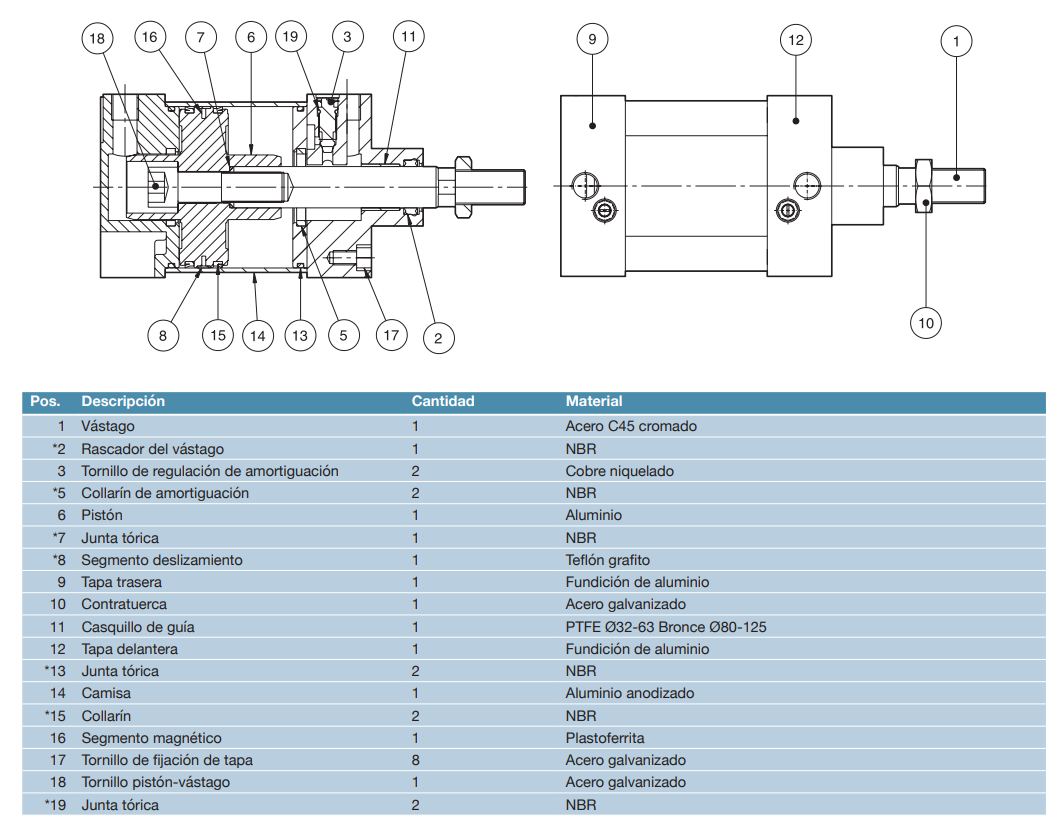

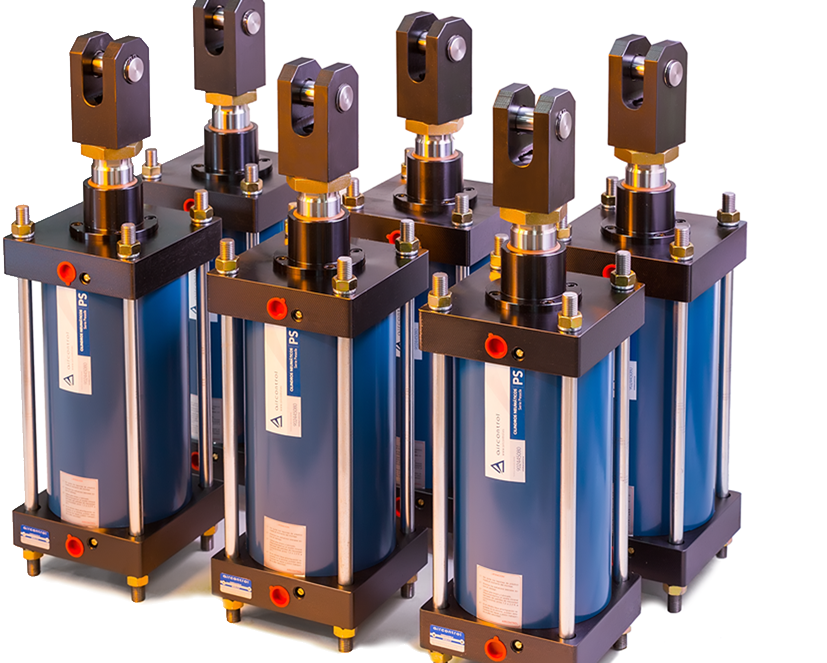!            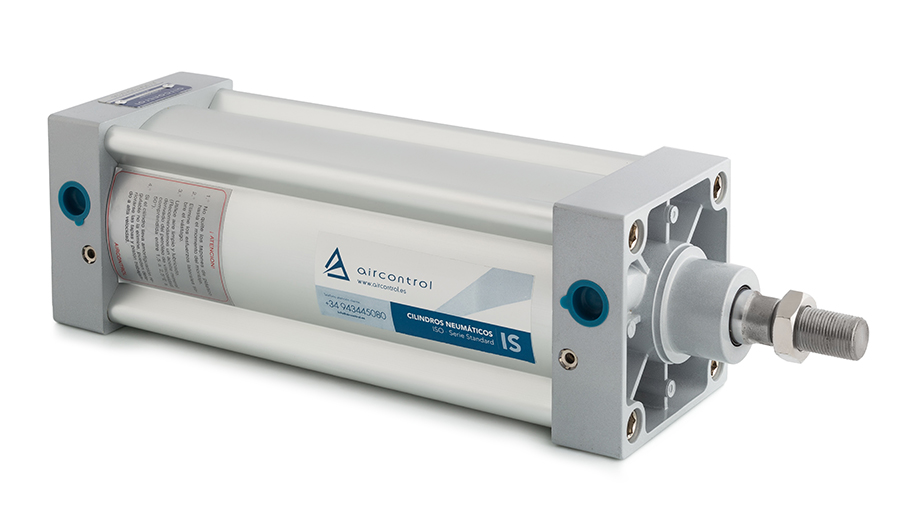!

## Indice

Pasos que he seguido:

- Extracción de datos de la base de datos
- Elección de variables a incorporar en el modelo
- Prueba de viavilidad con prototipo base
- Creacion de tabla definitiva para el modelo
- Preparacion de variables
- Entrenamiento
- Analisis de resultados

## Definiendo dataframes desde CSV extraidos de la base de datos

In [1]:
import pandas as pd
import re
import numpy as np

- Tabla de todos los articulos

In [4]:
df_articulos = pd.read_csv(r'.\DATA\ARTICULOS.csv', sep = ';')
df_articulos

c:\users\andoni\desktop\master data science\pruebaenv\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (18,19,26,27,28,29,30,31,32,33,34,37,42,50,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEQ_ARTICULO,ARTICULO,REF_ALTERNATIVA,SEQ_CLIPRO,GRUPO,FAMILIA,SUBFAMILIA,FABRICANTE,NOMBRE,NOMBRE_ABR,...,COD_CATEGORIA,GRUPED,ART_RAPEL,GRUPOFAB,STOCKPROV,UGV,SUBIDA,IMAGEN,NWPROD,LOTE
0,187714,1099999995,1099999995,NaN,30,10,NaN,NaN,MANO DE OBRA DE REPARACION - HORA,MANO DE OBRA DE REPA,...,9,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187715,1119012001,11190012,NaN,36,411,NaN,NaN,REDONDO CROMADO F-114 Ø12 MM,REDONDO CROMADO F-11,...,4,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187716,1119016000,11190016,NaN,36,411,NaN,NaN,REDONDO CROMADO F-114 Ø16 MM,REDONDO CROMADO F-11,...,4,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187717,1119018008,11190018,NaN,36,411,NaN,NaN,REDONDO CROMADO F-114 Ø18 MM,REDONDO CROMADO F-11,...,4,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187718,11190200000,11190200000,NaN,0,411,NaN,NaN,RED CROM 20 1119.020X00,RED CROM 20 1119.020,...,4,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61974,261427,60.064/04,60.064/04,NaN,46,962,NaN,NaN,TAPA TRASERA S/P 60.064/04,TAPA TRASERA S/P 60.,...,3,101,NaN,1.0,N,NaN,NaN,NaN,NaN,NaN
61975,261428,60.064/06,60.064/06,NaN,46,962,NaN,NaN,CABEZA ROTULA S/P 60.064/06,CABEZA ROTULA S/P 60,...,3,101,NaN,1.0,N,NaN,NaN,NaN,NaN,NaN
61976,261429,VSN0910,VSN0910,NaN,29,156,NaN,NaN,VALVULA DE SEGURIDAD VSN0910,VALVULA DE SEGURIDAD,...,5,18,NaN,NaN,N,3.0,NaN,NaN,NaN,NaN
61977,261430,K18-090-070,K18-090-070,NaN,0,534,NaN,NaN,JUNTA PISTON 90X70 E35.1 PTFE.NBR.POM,JUNTA PISTON 90X70 E,...,5,750,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_articulos[df_articulos['ARTICULO']=='JP907D040A002']

,SEQ_ARTICULO,ARTICULO,REF_ALTERNATIVA,SEQ_CLIPRO,GRUPO,FAMILIA,SUBFAMILIA,FABRICANTE,NOMBRE,NOMBRE_ABR,...,COD_CATEGORIA,GRUPED,ART_RAPEL,GRUPOFAB,STOCKPROV,UGV,SUBIDA,IMAGEN,NWPROD,LOTE
61965,261418,JP907D040A002,JP907D040A002,NaN,0,534,NaN,NaN,ARODURO 40X2.18 (8-129) NBR 90SH,ARODURO 40X2.18 (8-1,...,5,750,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_articulos[df_articulos['SEQ_ARTICULO']=='261418']

,SEQ_ARTICULO,ARTICULO,REF_ALTERNATIVA,SEQ_CLIPRO,GRUPO,FAMILIA,SUBFAMILIA,FABRICANTE,NOMBRE,NOMBRE_ABR,...,COD_CATEGORIA,GRUPED,ART_RAPEL,GRUPOFAB,STOCKPROV,UGV,SUBIDA,IMAGEN,NWPROD,LOTE


- Tabla de conjuntos, la tabla que contiene los articulos que están hechos por varios articulos

In [7]:
df_conjuntos = pd.read_csv(r'.\DATA\CONJUNTO FAB.csv', sep = ';')
df_conjuntos

,SEQ_CONJ,NIVEL_ALT,SEQ_ARTICULO,DESCRIPCION,VERIFICADO
0,268302,0,194392,CONJUNTO TAPA TRASERA AG70FB20A,n
1,268308,0,214297,CIL 80MS063A0100,n
2,268327,0,214298,CIL 80MS160A0635,s
3,268347,0,208666,CIL AA70A063A1080M,n
4,268372,0,208436,CIL AA70A06A115M,n
...,...,...,...,...,...
26723,375311,0,261425,CASCUILLO GUIA S/P 60.064/03,s
26724,375312,0,261426,PISTON S/P 60.064/03,s
26725,375313,0,261427,TAPA TRASERA S/P 60.064/04,s
26726,375314,0,261428,CABEZA ROTULA S/P 60.064/06,s


- Tabla de estructuras, incluye los articulos para cada conjunto

In [8]:
df_estructuras = pd.read_csv(r'.\DATA\DET_CONJFAB.csv', sep = ';')
df_estructuras

,SEQ_DETCONJ,UNIDADES,SEQ_CONJ,SEQ_ARTICULO,ORDEN,SEQ_SUBCONJ
0,287546,"4,0000",287532,195657,210,NaN
1,287547,"1,0000",287532,190518,220,NaN
2,287548,"1,0000",287532,192512,230,NaN
3,287549,"4,0000",287532,208479,30,NaN
4,287550,"1,0000",287532,197111,40,351264.0
...,...,...,...,...,...,...
167414,487728,"0,6420",374546,187720,10,NaN
167415,487729,"1,0000",374544,252039,30,NaN
167416,487730,"1,0000",374544,220553,40,NaN
167417,487731,"1,0000",374544,220567,50,NaN


- Tabla de movimientos, este recoge todos los movimientos de los articulos (salidas y entradas) que han habido en la empresa

In [9]:
df_movimientos = pd.read_csv(r'.\DATA\MOVIMIENTO ALMACEN.csv', sep = ',',low_memory=False)
df_movimientos.head(500)

,SEQ_MOV,ALM_SEQ_ALMACEN,ARTI_SEQ_ARTICULO,EMPR_N_EMPRESA,TIPOM_COD_MOV,FEC_MOV,UNIDADES,ENT_SAL,TESO_SEQ_CLIPRO,DOC_COMPRA,...,PR_MED_ANT1,PRECIO1,SEQ_ALB,DTO1,DTO2,DTO3,DTO4,SEQ_LPED,EMPLEADO,SEQ_OFERTA
0,97724,1,187714,1,EREG,1999-12-31 00:00:00,568.5,E,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97725,3,187714,1,EREG,1999-12-31 00:00:00,977.5,E,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97726,2304,187714,1,EREG,1999-12-31 00:00:00,951.0,E,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97727,2312,187714,1,EREG,1999-12-31 00:00:00,997.0,E,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97728,1,187715,1,EREG,1999-12-31 00:00:00,2.1,E,NaN,NaN,...,NaN,3.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,98220,1,189190,1,EREG,1999-12-31 00:00:00,1.0,E,NaN,NaN,...,NaN,349.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,98221,1,189194,1,EREG,1999-12-31 00:00:00,22.0,E,NaN,NaN,...,NaN,153.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,98222,1,189197,1,EREG,1999-12-31 00:00:00,7.0,E,NaN,NaN,...,NaN,153.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,98223,2,189197,1,EREG,1999-12-31 00:00:00,1.0,E,NaN,NaN,...,NaN,153.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Tabla de las compras realizdas

In [10]:
df_albaran_compra = pd.read_csv(r'.\DATA\HISTORICO ALBARANES COMPRA.csv', sep = ';',low_memory=False)
df_albaran_compra

,SEQ_LALBP,CALBP_SEQ_CALBP,ARTI_SEQ_ARTICULO,RECEP_COMP,FEC_RECEP,LINEA_RECEP,TIPO_LINEA,CANT_REC,PRECIO1,TIPO_IVA,...,ALM_SEQ_ALMACEN,N_BULTOS,UDS_ENV,DTO_LIN3,DTO_LIN4,SEQ_CLIPRO,SEQ_LPED,ARTICULO,REF_ALTERNATIVA,NOMBRE
0,168170,76686,261439.0,57218,07/04/2021 0:00,1,C,2.0,213.0,2,...,1,NaN,NaN,NaN,NaN,73941,201145.0,KBT-2.5X9.7-100,KBT-2.5X9.7-100,BANDA GUIA PISTON-VASTAGO 115X100 E9.7 PTFE
1,168168,76684,261418.0,57216,06/04/2021 0:00,1,C,4.0,NaN,2,...,1,NaN,NaN,NaN,NaN,73941,201123.0,JP907D040A002,JP907D040A002,ARODURO 40X2.18 (8-129) NBR 90SH
2,168081,76645,261394.0,57177,24/03/2021 0:00,1,C,1.0,822.0,2,...,1,NaN,NaN,NaN,NaN,36613,201067.0,CREP-3922,CREP-3922,CARGAR GS-28-200-AA-990N-K59930 A 2500N
3,168082,76646,261394.0,57178,25/03/2021 0:00,1,C,1.0,822.0,2,...,1,NaN,NaN,NaN,NaN,36613,201067.0,CREP-3922,CREP-3922,CARGAR GS-28-200-AA-990N-K59930 A 2500N
4,168005,76620,261380.0,57152,25/03/2021 0:00,1,C,16.0,135.0,2,...,1,NaN,NaN,NaN,NaN,36165,200897.0,TR101D20D40,TR101D20D40,TORNILLO ALLEN DIN7984 M20 X 40 MM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148954,4897,2406,NaN,1864,03/07/2000 0:00,1,P,1.0,8249.0,2,...,1,NaN,NaN,NaN,NaN,36663,12097.0,NaN,NaN,NaN
148955,4885,2399,NaN,1857,30/06/2000 0:00,1,P,1.0,5734.0,2,...,1,NaN,NaN,NaN,NaN,36663,11858.0,NaN,NaN,NaN
148956,4302,2086,NaN,1557,31/05/2000 0:00,3,P,10.0,182.0,2,...,1,NaN,NaN,NaN,NaN,36163,11740.0,NaN,NaN,NaN
148957,4301,2086,NaN,1557,31/05/2000 0:00,2,P,4.0,214.0,2,...,1,NaN,NaN,NaN,NaN,36163,11739.0,NaN,NaN,NaN


## Creación de nuevos dataframes para trabajar

Como los tablas extraidas son de una base de datos, estan compuestas por secuencias para la optimización de consultas SQL, para que sea mas intuitivo y mas facil de trabajar se han creado nuevos dataframes

- Dataframe de compras

Limpiamos las secuencias NA y las convertimos en integer

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df_albaran_compra = df_albaran_compra[df_albaran_compra['ARTI_SEQ_ARTICULO'].notna()]    

df_albaran_compra['ARTI_SEQ_ARTICULO'] = pd.to_numeric(df_albaran_compra['ARTI_SEQ_ARTICULO'],downcast='integer')
    
df_albaran_compra



<ipython-input-12-b2b4b879965d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_albaran_compra['ARTI_SEQ_ARTICULO'] = pd.to_numeric(df_albaran_compra['ARTI_SEQ_ARTICULO'],downcast='integer')


,SEQ_LALBP,CALBP_SEQ_CALBP,ARTI_SEQ_ARTICULO,RECEP_COMP,FEC_RECEP,LINEA_RECEP,TIPO_LINEA,CANT_REC,PRECIO1,TIPO_IVA,LINEA_PED,TIT_LINEA,DTO_LIN,DTO_LIN2,PRO_REG,SIT_RECEP,IMP_LIN1,ALM_SEQ_ALMACEN,N_BULTOS,UDS_ENV,DTO_LIN3,DTO_LIN4,SEQ_CLIPRO,SEQ_LPED,ARTICULO,REF_ALTERNATIVA,NOMBRE
0,168170,76686,261439,57218,07/04/2021 0:00,1,C,2.0,213.0,2,NaN,BANDA GUIA PISTON-VASTAGO 115X100 E9.7 PTFE,0.0,NaN,NaN,NaN,426.0,1,NaN,NaN,NaN,NaN,73941,201145.0,KBT-2.5X9.7-100,KBT-2.5X9.7-100,BANDA GUIA PISTON-VASTAGO 115X100 E9.7 PTFE
1,168168,76684,261418,57216,06/04/2021 0:00,1,C,4.0,NaN,2,NaN,ARODURO 40X2.18 (8-129) NBR 90SH,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,73941,201123.0,JP907D040A002,JP907D040A002,ARODURO 40X2.18 (8-129) NBR 90SH
2,168081,76645,261394,57177,24/03/2021 0:00,1,C,1.0,822.0,2,NaN,CARGAR GS-28-200-AA-990N-K59930 A 2500N,0.0,NaN,NaN,NaN,822.0,1,NaN,NaN,NaN,NaN,36613,201067.0,CREP-3922,CREP-3922,CARGAR GS-28-200-AA-990N-K59930 A 2500N
3,168082,76646,261394,57178,25/03/2021 0:00,1,C,1.0,822.0,2,NaN,CARGAR GS-28-200-AA-990N-K59930 A 2500N,0.0,NaN,NaN,NaN,822.0,1,NaN,NaN,NaN,NaN,36613,201067.0,CREP-3922,CREP-3922,CARGAR GS-28-200-AA-990N-K59930 A 2500N
4,168005,76620,261380,57152,25/03/2021 0:00,1,C,16.0,135.0,2,NaN,TORNILLO ALLEN DIN7984 M20 X 40 MM,0.0,NaN,NaN,NaN,216.0,1,NaN,NaN,NaN,NaN,36165,200897.0,TR101D20D40,TR101D20D40,TORNILLO ALLEN DIN7984 M20 X 40 MM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143468,37593,17652,187715,10334,06/09/2004 0:00,2,C,NaN,328.0,2,NaN,MTS.REDONDO CROMADO DE 12,NaN,NaN,NaN,F,NaN,1,NaN,NaN,NaN,NaN,36649,NaN,1119012001,11190012,REDONDO CROMADO F-114 Ø12 MM
143469,20259,9433,187715,8735,23/07/2002 0:00,2,C,3.0,237.0,2,NaN,MTS.REDONDO CROMADO DE 12,NaN,NaN,NaN,F,711.0,1,NaN,NaN,NaN,NaN,36562,NaN,1119012001,11190012,REDONDO CROMADO F-114 Ø12 MM
143470,20258,9433,187715,8735,23/07/2002 0:00,1,C,12.0,237.0,2,NaN,MTS.REDONDO CROMADO DE 12,NaN,NaN,NaN,F,2844.0,1,NaN,NaN,NaN,NaN,36562,29441.0,1119012001,11190012,REDONDO CROMADO F-114 Ø12 MM
143471,10078,4825,187715,4193,14/03/2001 0:00,1,C,58.0,238.0,2,NaN,MTS.REDONDO CROMADO DE 12,NaN,NaN,NaN,F,1381.0,1,NaN,NaN,NaN,NaN,36562,18090.0,1119012001,11190012,REDONDO CROMADO F-114 Ø12 MM


- Sacamos los articulos comprados del dataframe de los movimientos

ECF son las siglas que significa que el movimiento es una compra para fabricación, como nuestro caso los cilindros son fabricados, filtramos las comrpas que nos interesan

In [13]:
df_movimientos_compra = df_movimientos[df_movimientos['TIPOM_COD_MOV']== 'ECF']
df_movimientos_compra

,SEQ_MOV,ALM_SEQ_ALMACEN,ARTI_SEQ_ARTICULO,EMPR_N_EMPRESA,TIPOM_COD_MOV,FEC_MOV,UNIDADES,ENT_SAL,TESO_SEQ_CLIPRO,DOC_COMPRA,DOC_VENTA,SERIE,SEQ_LALB,ALB_PROVE,FEC_ALBPROV,EXIST_ANT,PR_MED_ANT1,PRECIO1,SEQ_ALB,DTO1,DTO2,DTO3,DTO4,SEQ_LPED,EMPLEADO,SEQ_OFERTA
3006,100745,1,214295,1,ECF,2000-01-10 00:00:00,6.00,E,36646.0,17.0,NaN,01,712.0,256436,NaN,2458.580,14.78,14.78,447.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3007,100746,1,187719,1,ECF,2000-01-10 00:00:00,4.00,E,36173.0,18.0,NaN,01,713.0,197395,NaN,760.000,4.57,4.57,448.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3008,100747,1,187719,1,ECF,2000-01-10 00:00:00,20.12,E,36173.0,18.0,NaN,01,714.0,197395,NaN,759.997,4.57,4.57,448.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3017,100756,1,214437,1,ECF,2000-01-05 00:00:00,4.00,E,36190.0,19.0,NaN,01,715.0,E266478,NaN,198.000,1.19,1.19,449.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3018,100757,1,214437,1,ECF,2000-01-05 00:00:00,2.00,E,36190.0,19.0,NaN,01,716.0,E266478,NaN,178.000,0.83,0.83,449.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786926,919714,1,259720,1,ECF,2021-06-22 00:00:00,1.00,E,36568.0,57891.0,NaN,01,169881.0,527418,NaN,NaN,16.80,16.80,77409.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
786927,919715,1,259723,1,ECF,2021-06-22 00:00:00,1.00,E,36568.0,57891.0,NaN,01,169882.0,527418,NaN,NaN,17.82,17.82,77409.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
786928,919716,1,216544,1,ECF,2021-06-21 00:00:00,8.00,E,36568.0,57892.0,NaN,01,169883.0,527332,NaN,NaN,26.64,26.64,77410.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
786929,919717,1,251289,1,ECF,2021-06-21 00:00:00,8.00,E,36568.0,57892.0,NaN,01,169884.0,527332,NaN,NaN,92.10,92.10,77410.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


- Creacion dataframe de cilindros que se han fabricado

Hay muchisimos cilindros creados en la base de datos que no nos sirven por distintas razones, haciendo distintos filtrajes de datos vamos a quedarnos con los que se han fabricado y son los especiales que queremos

Primero de todo seleccionamos los que tienen movimietos

In [14]:
arti_con_movimientos = df_movimientos['ARTI_SEQ_ARTICULO'].unique()
arti_con_movimientos

array([187714, 187715, 187716, ..., 261769, 261835, 259725], dtype=int64)

In [15]:
#Creamos nuevas columnas para incluir los codigos de los articulos en el dataframe de las estructuras
df_estructuras['ARTICULO'] = None
df_estructuras['ARTICULO_REF_ALTER'] = None
df_estructuras

,SEQ_DETCONJ,UNIDADES,SEQ_CONJ,SEQ_ARTICULO,ORDEN,SEQ_SUBCONJ,ARTICULO,ARTICULO_REF_ALTER
0,287546,"4,0000",287532,195657,210,NaN,None,None
1,287547,"1,0000",287532,190518,220,NaN,None,None
2,287548,"1,0000",287532,192512,230,NaN,None,None
3,287549,"4,0000",287532,208479,30,NaN,None,None
4,287550,"1,0000",287532,197111,40,351264.0,None,None
...,...,...,...,...,...,...,...,...
167414,487728,"0,6420",374546,187720,10,NaN,None,None
167415,487729,"1,0000",374544,252039,30,NaN,None,None
167416,487730,"1,0000",374544,220553,40,NaN,None,None
167417,487731,"1,0000",374544,220567,50,NaN,None,None


In [16]:
#seleccionamos las columnas que nos interesan
df_estructuras = df_estructuras[['SEQ_CONJ','ORDEN','ARTICULO','ARTICULO_REF_ALTER','SEQ_ARTICULO','UNIDADES']]
df_estructuras

,SEQ_CONJ,ORDEN,ARTICULO,ARTICULO_REF_ALTER,SEQ_ARTICULO,UNIDADES
0,287532,210,None,None,195657,"4,0000"
1,287532,220,None,None,190518,"1,0000"
2,287532,230,None,None,192512,"1,0000"
3,287532,30,None,None,208479,"4,0000"
4,287532,40,None,None,197111,"1,0000"
...,...,...,...,...,...,...
167414,374546,10,None,None,187720,"0,6420"
167415,374544,30,None,None,252039,"1,0000"
167416,374544,40,None,None,220553,"1,0000"
167417,374544,50,None,None,220567,"1,0000"


In [17]:
#limpiamos de NA el dataframe de conjuntos antes de usarlo, ya que de aquí sacaremos a que secuencia de conjunto correspone da secuencia del artículo
df_conjuntos = df_conjuntos[df_conjuntos['SEQ_CONJ'].notna()]
df_conjuntos

,SEQ_CONJ,NIVEL_ALT,SEQ_ARTICULO,DESCRIPCION,VERIFICADO
0,268302,0,194392,CONJUNTO TAPA TRASERA AG70FB20A,n
1,268308,0,214297,CIL 80MS063A0100,n
2,268327,0,214298,CIL 80MS160A0635,s
3,268347,0,208666,CIL AA70A063A1080M,n
4,268372,0,208436,CIL AA70A06A115M,n
...,...,...,...,...,...
26723,375311,0,261425,CASCUILLO GUIA S/P 60.064/03,s
26724,375312,0,261426,PISTON S/P 60.064/03,s
26725,375313,0,261427,TAPA TRASERA S/P 60.064/04,s
26726,375314,0,261428,CABEZA ROTULA S/P 60.064/06,s


In [ ]:
#rellenamos la columna creada con la secuencia del articulo
h = 0
lista_conjunto = list()
for i in zip(df_estructuras['SEQ_CONJ']) :
    
    try:
        a = df_conjuntos.loc[df_conjuntos['SEQ_CONJ'] == i , 'SEQ_ARTICULO'].iloc[0]
        
    except:
        print(i , 'HA DADO ERROR')
    
    lista_conjunto.append(a)

df_estructuras['ARTICULO'] = lista_conjunto
      

df_estructuras

In [ ]:
#creamos listas para:

#articulos que son conjuntos (que están compuestos por mas articulos)
lista_art_conj = list()
#lista de referencias de sub-articulo
lista_articulo = list()
#lista de referencias alternativas de sub-articulo
lista_articulo_alt = list()
#lista de descripcion de articulo
lista_des_articulo = list()
for j,k in zip(df_estructuras['ARTICULO'],df_estructuras['SEQ_ARTICULO']) :
    b = df_articulos.loc[df_articulos['SEQ_ARTICULO'] == j , 'ARTICULO'].iloc[0]
    lista_art_conj.append(b)
    c = df_articulos.loc[df_articulos['SEQ_ARTICULO'] == k , 'ARTICULO'].iloc[0]
    lista_articulo.append(c)
    e = df_articulos.loc[df_articulos['SEQ_ARTICULO'] == k , 'REF_ALTERNATIVA'].iloc[0]
    lista_articulo_alt.append(e)
    d = df_articulos.loc[df_articulos['SEQ_ARTICULO'] == k , 'NOMBRE'].iloc[0]
    lista_des_articulo.append(d)

df_estructuras['ARTICULO'] = lista_art_conj
df_estructuras['SEQ_ARTICULO'] = lista_articulo   
df_estructuras['DESCRIPCION'] = lista_des_articulo  
df_estructuras['ARTICULO_REF_ALTER'] = lista_articulo_alt 
            
df_estructuras            

Ahora tenemos un dataframe donde en ARTICULOS tenemos los codigos de los cilindros, en SEQ_ARTICULO tenemos los articulos que componen los cilindros.
También hay información adicional como la descripción y unidades.

In [ ]:
#como tarda en ejecutarse, si hay un fallo no tener que empezar el notebook de 0 lo guardamos en un csv
#df_estructuras.to_csv(r'..\DATA\DF_ESTRUCTURAS_MODIFICADO.csv', index=False)

In [ ]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 50)

Cargamos el csv guardado anteriormente

In [19]:
df_estructuras = pd.read_csv(r'.\DATA\DF_ESTRUCTURAS_MODIFICADO.csv')
df_estructuras

,SEQ_CONJ,ORDEN,ARTICULO,ARTICULO_REF_ALTER,SEQ_ARTICULO,UNIDADES,DESCRIPCION
0,287532,210,A70A10A90M,701019,701019,"4,0000",ARANDELA NOMEL DE 18(872.180)
1,287532,220,A70A10A90M,70FS10A,3007710000,"1,0000",SEGMENTO MAGNETICO 70FS10A
2,287532,230,A70A10A90M,701015,70JM100,"1,0000",SEGEMNTO GUIA PISTON 97*100*10
3,287532,30,A70A10A90M,70DA10A0090,B470A10DA90,"4,0000",TIRANTE S/P 70DA10A.C-90
4,287532,40,A70A10A90M,70FE10BM,70FE10BM,"1,0000",CABEZA DE PISTON S/P 70FE10BM
...,...,...,...,...,...,...,...
167414,374546,10,701CA08A0500,11190025,1119025000,"0,6420",REDONDO CROMADO F-114 Ø25 MM
167415,374544,30,A705A080A0500,KIT701080,KIT701080,"1,0000",KIT PISTON TAPAS SERIE 701 DIAMETRO 80 NBR
167416,374544,40,A705A080A0500,ETQ0010,ETQ0010,"1,0000",ETIQUETA SERIE IS 60 X 24
167417,374544,50,A705A080A0500,ETQ0300,ETQ0300,"1,0000",ETIQUETA ATENCION 40 X 40


Escogemos el codigo de un cilindro y analizamos como queda el dataframe

In [20]:
df_estructuras[df_estructuras['ARTICULO'] == 'A705A080A0500']

,SEQ_CONJ,ORDEN,ARTICULO,ARTICULO_REF_ALTER,SEQ_ARTICULO,UNIDADES,DESCRIPCION
167411,374544,10,A705A080A0500,705BA08A0500,705BA08A0500,"1,0000",CAMISA S/P 705BA08A.C-500
167413,374544,20,A705A080A0500,701CA08A0500,701CA08A0500,"1,0000",VASTAGO S/P 701CA08A.C-500
167415,374544,30,A705A080A0500,KIT701080,KIT701080,"1,0000",KIT PISTON TAPAS SERIE 701 DIAMETRO 80 NBR
167416,374544,40,A705A080A0500,ETQ0010,ETQ0010,"1,0000",ETIQUETA SERIE IS 60 X 24
167417,374544,50,A705A080A0500,ETQ0300,ETQ0300,"1,0000",ETIQUETA ATENCION 40 X 40
167418,374544,60,A705A080A0500,ETQ0430,ETQ0430,"1,0000",ETIQUETA TECNICA 65 X 20


Aplicamos unos filtros y quitamos los siguientes elementos, esto es un primer filtro general, se podría pulir mas:
- Si empieza por una letra no es un cilindro especial, ya que todos empiezan por números
- Si la longitud es menos que 10 tampoco lo es debido a la colidificación que utilizamos
- Si tiene el "KR" significa que es un kit de juntas
- Si contiene un "LM" significa que es material suelto de paneles neumáticos
- Si contiene "KIT" es un Kit de repuestos
- Si contiene "RC" significa que son racores
- Si pasa todos estos filtros y además contiene una "P" en la posicion 4 por detras (es la codificación que usamos para cilindros especiales), añadimos a la lista de cilindros especiales "df_cilindros"

Por último filtramos el dataframe de articulos con la lista que hemos creado

In [21]:
#creamos una lista de articulos unicos que tienen estructura
lista_art = pd.unique(df_estructuras['ARTICULO'])
lista_art

array(['A70A10A90M', 'A70A10A900', 'A70A12', ..., 'A705A080A0500',
       '705BA08A0500', '701CA08A0500'], dtype=object)

In [22]:
ref_esp = list()
count = 0
for i in lista_art:
    if 'A' == i[0]:
        continue
    if len(i)<10:
        continue
        
    if 'KR' in i:
        continue
        
    if 'LM' in i:
        continue
        
    if 'KIT' in i:
        continue
        
    if 'RC' in i:
        continue
        
    if 'P' == i[-4]:
        ref_esp.append(i)
        count += 1
        
df_cilindros = df_articulos[df_articulos['ARTICULO'].isin(ref_esp) ]
df_cilindros

,SEQ_ARTICULO,ARTICULO,REF_ALTERNATIVA,SEQ_CLIPRO,GRUPO,FAMILIA,SUBFAMILIA,FABRICANTE,NOMBRE,NOMBRE_ABR,NOMBRE_PRO,TIPO_ALMACEN,TIPO_IVA,IMPORTACION,DTO_CIAL,FEC_ALTA,FEC_BAJA,FEC_BAJA_COM,COD_BARRA,COD_BCAJA,UDS_ENV,UDS_MINIMA,PESO_UNIDAD,PESO_CAJA,UNID_PALET,PESO_PALET,FORMATO,ATR1_FORMATO,ATR2_FORMATO,ATR3_FORMATO,ATR4_FORMATO,ATR5_FORMATO,ATR6_FORMATO,CLAVE_DTO,DTO_FIJO,STOCK,MARGEN,CTA_VENTAS,CTA_COMPRAS,OBSER,SEQ_MARGEN,UNID_MEDIDA,NUM_PLANO,COD_CATEGORIA,GRUPED,ART_RAPEL,GRUPOFAB,STOCKPROV,UGV,SUBIDA,IMAGEN,NWPROD,LOTE
7945,195659,7020N300P437,7020N300P437,NaN,5,140,NaN,NaN,CIL 7020N300P437,CIL 7020N300P437,NaN,1,2,NaN,NaN,07/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
7946,195660,7025N450P436,7025N450P436,NaN,5,140,NaN,NaN,CIL 7025N450P436,CIL 7025N450P436,NaN,1,2,NaN,NaN,07/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
7947,195661,7032N600P435,7032N600P435,NaN,5,140,NaN,NaN,CIL 7032N600P435,CIL 7032N600P435,NaN,1,2,NaN,NaN,07/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
8063,195777,ES02N14P440,ES02N14P440,NaN,5,140,NaN,NaN,CIL ES02N14P440,CIL ES02N14P440,NaN,1,2,NaN,NaN,28/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
8076,195790,3035A450P441,3035A450P441,NaN,5,140,NaN,NaN,CIL 3035A450P441,CIL 3035A450P441,NaN,1,2,NaN,NaN,29/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61679,261110,20200A0300P062,20200A0300P062,NaN,1,140,NaN,NaN,CIL 20200A0300P062,CIL 20200A0300P062,NaN,1,2,NaN,NaN,05/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,"Cil. CNOMO std., Vitón, Electrov. 5/2 1/2"", 1 ...",NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
61718,261149,HES050N1200P067,HES050N1200P067,NaN,0,550,NaN,NaN,CIL. HIDRAULICO REF.- HES050N1200P067,CIL. HIDRAULICO REF.,NaN,1,2,NaN,NaN,09/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,S,NaN,NaN,NaN,TIPO CHL DE HIDROCIL CON PATAS,NaN,NaN,NaN,2,60,NaN,1.0,N,1.0,NaN,NaN,NaN,NaN
61720,261151,HES100N0080P070,HES100N0080P070,NaN,0,550,NaN,NaN,CIL. HIDRAULICO REF.- HES100N0080P070,CIL. HIDRAULICO REF.,NaN,1,2,NaN,NaN,09/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,S,NaN,NaN,NaN,TAPA GUIA CUADRADA PARA AMARRE,NaN,NaN,NaN,2,60,NaN,1.0,N,1.0,NaN,NaN,NaN,NaN
61757,261189,20160A0310P072,20160A0310P072,NaN,1,140,NaN,NaN,CIL 20160A0310P072,CIL 20160A0310P072,NaN,1,2,NaN,NaN,11/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,"Estándar con racores (reducción 3/4"" M - 1"" H)",NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN


## Elección de variables para el modelo

Los variables principales que influyen en el precio de un cilindro neumático son:
- Dimensiones: el diametro y el recorrido especialmente
- Materiales: pueden ser de distintos materiales según a petición del cliente o condiciones de trabajo
- Amarres: elementos que se utilizan para amarrar los cilindros a las máquinas

Otros variables que hemos seleccionado son:
- Si está compuesto con un KIT: esto es debido a que algunos cilindros especiales utilizan el KIT (tapas, piston y juntas) estandares, el cual es mucho mas barato que los que se fabrican a medida.
- Si es de alta temperatura, las juntas son especiales.
- Si lleva amortiguación o no.
- Dimensiones de cada elemento.
- Extras: para detectar los variantes especialmente especiales

Lo primero de todo creamos unos diccionarios donde determinaremos las palabras claves de las variables.

In [23]:
dic_elem = dict
dic_elem = {0:'CAMISA',1:'VASTAGO',2:['VARILLA','TIRANTE'],3:'PISTON',4:'TAPA TRAS',5:['TAPA GUIA','TAPA DEL','TAPA PIÑON','TAPA','TAPA FUELLE']}
dic_mp = {0:['ACERO','F-114','F.114','F114','CHAPA','CUADRADO F-114'],1:'ALUMINIO', 2:'CROMADO',3: 'BRONCE', 4: ['F-2111','ZINCADO'], 7:'INOX', 10:'MP',12:'PERFORADA', 13:'METACRILATO '}
dic_elem_col_mp = {0:'MP CAMISA',1:'MP VASTAGO',2:'MP VARILLAS',3:'MP CABEZA PISTON',4:'MP TAPA TRASERA',5:'MP TAPA GUIA'}
dic_elem_col_dim = {0:'DIM CAMISA',1:'DIM VASTAGO',2:'DIM VARILLAS',3:'DIM CABEZA PISTON',4:'DIM TAPA TRASERA',5:'DIM TAPA GUIA'}
lista_amarres = ['FUELLE','SENSOR','DETECTOR','ESCUADRA','BRIDA','ARTICULACION MACHO','ARTICULACION HEMBRA','SOPORTE','SOPORTE ARTICULACION','ZUNCHO','ARTICULACION SOPORTE ROTULA','SOPORTE CON ROTULA','ARTICULACION TRASERA CON ROTULA','ROTULA','HORQUILLA','BULON','CONTRATUERCA','BLOQUEO','GUIADO','CREMALLERA','SOPORTE CENTRAL','PIÑON']
for key,value in dic_elem_col_mp.items():
    df_cilindros[value]= None

for key,value in dic_elem_col_dim.items():
    df_cilindros[value]= None

df_cilindros['ALTA TEMPERATURA']= 0
df_cilindros['AMORTIGUACION']= 0

<ipython-input-23-9d437289841e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cilindros[value]= None
<ipython-input-23-9d437289841e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cilindros[value]= None
<ipython-input-23-9d437289841e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

El gran problema que me he encontrado es que no he podido trabajar según la codificación de cada elemento, ya que con el paso de los años y las diferentes personas que han pasado por la empresa no se ha mantenido un estandar de códigos y es imposible definir unas normas para saber de que estamos hablando con ellos.

Por lo tanto, he decidido trabajar con las descripciones de los artículos que es mejor a la hora de definir normas.

Hemos diferenciado los elementos principales que componen un cilindro:
- CAMISA
- VASTAGO
- TIRANTES
- PISTON
- TAPA GUIA
- TAPA TRASERA
- KIT

También hemos añadido un diccionario con los materiales habituales que se utilizan, donde he ido añadiendo mas según he ido encontrando materiales faltantes.

Con los elementos principales hemos creado columnas para la Materia Prima (MP) y dimensiones (DIM).

Por último hemos creado una lista con todos los posibles amarres.

In [24]:
#exploramos como ha quedado
df_cilindros

,SEQ_ARTICULO,ARTICULO,REF_ALTERNATIVA,SEQ_CLIPRO,GRUPO,FAMILIA,SUBFAMILIA,FABRICANTE,NOMBRE,NOMBRE_ABR,NOMBRE_PRO,TIPO_ALMACEN,TIPO_IVA,IMPORTACION,DTO_CIAL,FEC_ALTA,FEC_BAJA,FEC_BAJA_COM,COD_BARRA,COD_BCAJA,UDS_ENV,UDS_MINIMA,PESO_UNIDAD,PESO_CAJA,UNID_PALET,PESO_PALET,FORMATO,ATR1_FORMATO,ATR2_FORMATO,ATR3_FORMATO,ATR4_FORMATO,ATR5_FORMATO,ATR6_FORMATO,CLAVE_DTO,DTO_FIJO,STOCK,MARGEN,CTA_VENTAS,CTA_COMPRAS,OBSER,SEQ_MARGEN,UNID_MEDIDA,NUM_PLANO,COD_CATEGORIA,GRUPED,ART_RAPEL,GRUPOFAB,STOCKPROV,UGV,SUBIDA,IMAGEN,NWPROD,LOTE,MP CAMISA,MP VASTAGO,MP VARILLAS,MP CABEZA PISTON,MP TAPA TRASERA,MP TAPA GUIA,DIM CAMISA,DIM VASTAGO,DIM VARILLAS,DIM CABEZA PISTON,DIM TAPA TRASERA,DIM TAPA GUIA,ALTA TEMPERATURA,AMORTIGUACION
7945,195659,7020N300P437,7020N300P437,NaN,5,140,NaN,NaN,CIL 7020N300P437,CIL 7020N300P437,NaN,1,2,NaN,NaN,07/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,0
7946,195660,7025N450P436,7025N450P436,NaN,5,140,NaN,NaN,CIL 7025N450P436,CIL 7025N450P436,NaN,1,2,NaN,NaN,07/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,0
7947,195661,7032N600P435,7032N600P435,NaN,5,140,NaN,NaN,CIL 7032N600P435,CIL 7032N600P435,NaN,1,2,NaN,NaN,07/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,0
8063,195777,ES02N14P440,ES02N14P440,NaN,5,140,NaN,NaN,CIL ES02N14P440,CIL ES02N14P440,NaN,1,2,NaN,NaN,28/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,0
8076,195790,3035A450P441,3035A450P441,NaN,5,140,NaN,NaN,CIL 3035A450P441,CIL 3035A450P441,NaN,1,2,NaN,NaN,29/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61679,261110,20200A0300P062,20200A0300P062,NaN,1,140,NaN,NaN,CIL 20200A0300P062,CIL 20200A0300P062,NaN,1,2,NaN,NaN,05/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,"Cil. CNOMO std., Vitón, Electrov. 5/2 1/2"", 1 ...",NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,0
61718,261149,HES050N1200P067,HES050N1200P067,NaN,0,550,NaN,NaN,CIL. HIDRAULICO REF.- HES050N1200P067,CIL. HIDRAULICO REF.,NaN,1,2,NaN,NaN,09/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,S,NaN,NaN,NaN,TIPO CHL DE HIDROCIL CON PATAS,NaN,NaN,NaN,2,60,NaN,1.0,N,1.0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,0
61720,261151,HES100N0080P070,HES100N0080P070,NaN,0,550,NaN,NaN,CIL. HIDRAULICO REF.- HES100N0080P070,CIL. HIDRAULICO REF.,NaN,1,2,NaN,NaN,09/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,S,NaN,NaN,NaN,TAPA GUIA CUADRADA PARA AMARRE,NaN,NaN,NaN,2,60,NaN,1.0,N,1.0,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,0,0
61757,261189,20160A0310P072,20160A0310P072,NaN,1,140,NaN,NaN,CIL 20160A0310P072,CIL 20160A0310P072,NaN,1,2,NaN,NaN,11/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,Na

In [25]:
pd.set_option('display.max_columns', None)

## Preparacion de variables

Empezamos con el código principal, aquí es donde rellenaremos la tabla anteriormente creada y donde empezaremos a utilizar los diccionarios creados. Iré comentando por linea porque es un poco complicado de entender

Las partes repetitivas los he definido en funciones, es recomendable para entender el código empezar a leer desde el programa principal.

In [26]:
def material_extra():
    global columna_extra
    global unidades_ref
    #hay que añadir en extras según cuantas unidades tenémos, por lo tanto hacemos el loop
    if key == 2:
        #esto se hace porque los cilindros llevan tirantes de 4 en 4
        unidades_ref = int(unidades_ref/4)

    for ud in range(unidades_ref-1):
        columna_extra = columna_extra + 1
        nombre_col_extra = 'EXTRA {}'.format(columna_extra)
        try:
            #si es una lista dará error
            df_cilindros.loc[df_cilindros['ARTICULO'] == ref , nombre_col_extra ] = value
        except:
            #en caso de lista para que coja el primero de la lista
            df_cilindros.loc[df_cilindros['ARTICULO'] == ref , nombre_col_extra ] = value[0]


In [27]:
def material_elemento(ref,n_columna,n_columna_dim, df_mp,key,value):
    global columna_extra
    global sin_material
    
    
    series_list = ['70','701','30','20','16','ES','HES','HT','HV','HR'] 
    

    descripcion_articulo = df_articulos.loc[df_articulos['ARTICULO'] == df_mp['SEQ_ARTICULO'].iloc[0] , 'NOMBRE'].iloc[0]


    #hacemos un loop en los materiales
    for key2,value2 in dic_mp.items():
        contador = 0
        #puede que el material también sea una lista
        if type(value2) == list:
            for v2 in value2:
                
                #definimos el contador para romper el loop
                contador = 0
                
                if v2 in descripcion_articulo or v2 in ref :
                    #si encuentra, activamos contador
                    contador = 1                  

                    #si el nombre de la materia prima contiene el valor del dicionario, ya sabemos de que esta hecho y lo guardamos en nuestra df principal como numero de key                    
                    #añadimos a la lista los elementos encontrados
                    
                    #como a veces también hay mismos elementos en distintas lineas, tenémos una lista donde cuando encontremos el elemento lo descarte y cuando lo encuentre de nuevo lo añada como extra
                    if key in elementos_poref:
                        
                        elementos_poref.remove(key)
                        df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_columna ] = value2[0]

                        #puede ser que haya 2 tapas guias, 2 pistones... si es así, uno hay que añadir como extra
                        #excepto los tirantes, estos tiene que haber mas de 4
                        if key != 2:
                            if unidades_ref > 1:
                                material_extra()

                        else:
                            #en caso de los tirantes
                            if unidades_ref > 4:
                                material_extra()


                        
                    else:
                        if key != 2:
                            if unidades_ref > 1:
                                material_extra()

                        else:
                            #en caso de los tirantes
                            if unidades_ref > 4:
                                material_extra()


                    
                    break
                
        else:
            
            #hacemos lo mismo si no es una lista
            if value2 in descripcion_articulo or value2 in ref :               
                
                if key in elementos_poref:
                    elementos_poref.remove(key)
                    df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_columna ] = value2

                    if key != 2:
                        if unidades_ref > 1:
                            material_extra()

                    else:
                        #en caso de los tirantes
                        if unidades_ref > 4:
                            material_extra()

                    
                else:
                    if key != 2:
                        if unidades_ref > 1:
                            material_extra()

                    else:
                        #en caso de los tirantes
                        if unidades_ref > 4:
                            material_extra()



                #como ya hemos llenado el campo de la df principal salimos del loop de la materia prima
                break
            #hacemos esto porque en casos de materia prima a veces solo aparece MP en la referencia del articulo
            elif value2 == 'MP':
                if 'MP' in df_mp['ARTICULO'].iloc[0] or 'MP' in df_mp['ARTICULO_REF_ALTER'].iloc[0]:
                    if key in elementos_poref:
                        elementos_poref.remove(key)
                        df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_columna ] = value2
                        
                    else:
                        columna_extra = columna_extra + 1
                        nombre_col_extra = 'EXTRA {}'.format(columna_extra)
                        df_cilindros.loc[df_cilindros['ARTICULO'] == ref , nombre_col_extra ] = value

                    break

                
        if contador == 1:
            break

    #ahora vamos a definir las dimensiones de la materia prima               
    
    #sacamos una lista de las palabras separandolas por distintas delimitaciones encontradas
    dimensiones = re.split('X|x| |Ø', descripcion_articulo)

    num = 1

    #filtramos las palabras para identificar y multiplicar las dimensiones

    num_list = list()
    ref_dim_list = list()
    for b in dimensiones:
        #como no hay ninguno mas grande que 999
        if len(b)>3:
            continue
        try:

            num = num * int(b)
            num_list.append(int(b))

        except:
            continue

    df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_columna_dim ] = num
    
    #para sacar el diametro del cilindro, sacamos el diametro del tubo de la camisa
    if key == 0:
        descripcion_articulo = df_articulos.loc[df_articulos['ARTICULO'] == df_mp['SEQ_ARTICULO'].iloc[0] , 'NOMBRE'].iloc[0]
        if 'TUBO' in descripcion_articulo:
            df_cilindros.loc[df_cilindros['ARTICULO'] == ref , 'DIAMETRO' ] = num_list[0]
            
        #En caso de que la camisa no este hecho con tubo lo sacamos de la referencia del cilindro        
        else:
            c = 0
            for s in series_list:
                if ref.startswith(s):
                    serie_split = ref[len(s):]
                    
                    ref_dim_list = re.split('A|P|N|B|C|F',serie_split)
                    break
                c = c + 1
            if c < len(series_list):
                if len(ref_dim_list[0]) < 3 :
                    try:
                        diametro = int(ref_dim_list[0]) * 10
                    except:
                        diametro = int(ref_dim_list[1]) * 10

                else:
                    diametro = int(ref_dim_list[0])
            
            if c == len(series_list) :   
                ref_dim_list = re.split('ES|A|P|HES|HT|HV|HR|701|70|20|N|30',ref)
                
                if len(ref_dim_list[1]) < 3 :
                    diametro = int(ref_dim_list[1]) * 10

                else:
                    diametro = int(ref_dim_list[1])
            
            df_cilindros.loc[df_cilindros['ARTICULO'] == ref , 'DIAMETRO' ] = diametro
            
        if indicador_carrera == 1:
            df_mp['UNIDADES'].iloc[0] = df_mp['UNIDADES'].iloc[0].replace(' ','')
            carrera = float(df_mp['UNIDADES'].iloc[0].replace(",", ".")) * 1000 - 100 #para pasar a milimetros y quitarle 100 para aproximarse a la carrera ya que no sabemos exacto cuanto será
            df_cilindros.loc[df_cilindros['ARTICULO'] == ref , 'CARRERA' ] = carrera

    if df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_columna ].iloc[0]  == None:
        sin_material = 1


In [28]:
def material_conjunto(df_mp,ref,key,value):
    global esunconjunto
    #puede ser que hayan subconjuntos dentro de un cilindro, en estos la lonjitud de la estructura de la materia prima sera mas que 1
    if len(df_mp)>1 or df_mp['ARTICULO'].iloc[0] in set(df_estructuras['ARTICULO']) or df_mp['ARTICULO_REF_ALTER'].iloc[0] in set(df_estructuras['ARTICULO']):

            
        #se hace el loop del conjunto
        for recon,recona in zip(df_mp['SEQ_ARTICULO'],df_mp['ARTICULO_REF_ALTER']):

            #se comprueba de nuevo si trabajar con la referencia estandar o la alternativa
            if recon in set(df_estructuras['ARTICULO']) or recona in set(df_estructuras['ARTICULO']):
                #se crea nueva dataframe de la estructura del conjunto
                try:
                    df_mp2 = df_estructuras[df_estructuras['ARTICULO'] == recon]
                except:
                    df_mp2 = df_estructuras[df_estructuras['ARTICULO'] == recona]
                #se ejecuta la funcion para conseguir material y dimensiones
                material_elemento(ref,n_columna,n_columna_dim,df_mp2,key,value)
                esunconjunto = 1
 

In [29]:
def material_comprado(ref,valor, nombre_columna,key):
    global columna_extra
    global romper
    comprado = 'COMPRADO'
    #hacemos lo de siempre pero en este caso como coprar suele salir mas caro ponemos como "COMPRADO" la materia prima para diferenciar
    if (df_movimientos_compra['ARTI_SEQ_ARTICULO'] == df_articulos.loc[df_articulos['ARTICULO'] == refin , 'SEQ_ARTICULO'].iloc[0]).any(): 
        if valor in df_articulos.loc[df_articulos[nombre_columna] == mp, 'NOMBRE'].iloc[0] :        
            
            if key in elementos_poref:
                elementos_poref.remove(key) 
                df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_columna ] = comprado

                #luego si hay extras lo ponemos como siempre
                if key != 2:
                    if unidades_ref > 1:
                        material_extra()

                else:
                    #en caso de los tirantes
                    if unidades_ref > 4:
                        material_extra()

            else:

                if key != 2:
                    if unidades_ref > 1:
                        material_extra()

                else:
                    #enc aso de los tirantes
                    if unidades_ref > 4:
                        material_extra()            

            romper = 1  
    

In [30]:
def material_montaje(ref,df_ref):
    global esuncilindro    
    global prueba
    global reforiginal
    
    
    #creamos una nueva variable para preservar la referencia original, porque si es un montaje, a partir de esta función vamos a ejecutar el resto de código con la nueva referencia. 
    reforiginal = ref
    
    #definimos las series neumáticas estandares en una lista, ya que ese define este tipo de montaje si el cilindro original es de estas series estandares.
    #el orden de la lista es importante, ya que los valores numericos se pueden confndir por otro valores y se ponen ultimos
    series_neumaticas = ['MS','LS','70','701','705','AQ70','30','35','A75','20']
    
    #hacemos un loop de las referencias estandar del dataframe de la estructura del cilindro
    for refin in df_ref['SEQ_ARTICULO']:
        
        #definímos una variable con la descripción del articulo
        descripcion = df_articulos.loc[df_articulos['ARTICULO'] == refin, 'NOMBRE'].iloc[0]
        
        #para romper el loop si ya ha encontrado el cilindro
        if esuncilindro == 1:
            break

        #haciendo un loop de las series y comprobamos si alguno está en el código del cilindro y si en la descripción pone "CIL"
        #En todas o casi todas las ocasiones en la descripción de un cilindro pone "CIL"
        for serie in series_neumaticas:
            if serie in refin and 'CIL' in descripcion:
                
                #como estos ya si son códigos estandares que no han cambiado durante los años se definen unas reglas para comprobar que estamos hablando de cilindros
                
                if serie in ['701','70','705','AQ70','30','35','A75']:
                    seriepos = refin.find(serie)
                    
                    try:
                        #en estas series el diametro tiene que estar en esta posicion
                        iniciodiam = seriepos+len(serie)+1
                        #si esto no da error, es que realmente es un cilindro
                        diam = int(refin[iniciodiam:iniciodiam+3])
                        
                        #redefinimos las variables para trabajar
                        esuncilindro = 1
                        ref = refin
                        df_ref = df_estructuras[df_estructuras['ARTICULO'] == refin]
                        break
                    except:
                        #como también hay algunos mal metidos añadimos otra regla
                        try:
                            iniciodiam = seriepos+len(serie)
                            diam = int(refin[iniciodiam:iniciodiam+3])
                            
                            esuncilindro = 1
                            ref = refin
                            df_ref = df_estructuras[df_estructuras['ARTICULO'] == refin]
                            break

                        except:
                            
                            break
                        
                elif serie in ['MS','LS','20']:
                    seriepos = refin.find(serie)
                    iniciodiam = seriepos+len(serie)
                    try:
                        diam = int(refin[iniciodiam:iniciodiam+3])
                        
                        esuncilindro = 1
                        ref = refin
                        df_ref = df_estructuras[df_estructuras['ARTICULO'] == refin]
                        break
                    except:
                        
                        break
                        
                
        #si el montaje lleva una electrovalvula, esto influye al precio asi que también añadimos la variable            
        if 'valvula' in descripcion:
            df_cilindros['VALVULA'] == 1
            break

        

In [31]:
%%time
#tenemos un dataframe de cilindros especiales que hemos definido anteriormente "df_cilindros"
#hacemos un loop de cada referencia para añadir a nuestro dataframe original para completar las variables que están vacias
for ref in df_cilindros['ARTICULO']:
    #definicion de variables, variables que hay que resetear por cada cilindro.
    prueba = 0
    elementos_poref = list()
    elementos_poref = elementos_poref.clear()
    elementos_poref = list(range(len(dic_elem_col_mp)))  
    ref_car_list = list()
    columna_extra = 0
    indicador_carrera = 0
    esuncilindro = 0
    contador_amarres = 0
    contador = 0
    c = 0
    i = 0
    cmp = 0
    
    #creamos un dataframe de la estructura de la referencia para trabajar con ello
    df_ref = df_estructuras[df_estructuras['ARTICULO'] == ref]
    
    
    #A veces, un cilindro es un montaje, contiene un cilindro original + elementos extra
    #comprobamos si es un montaje de cilindro con una función (la funcion no es necesaría pero lo pongo para que no cargue demasiado el código)
    material_montaje(ref,df_ref)
    
    #extraemos la carrera (recorrido) del cilindro de la referencia
    #para esto hacemos un split de la referencia ya que sabemos que parte es la que corresponde a la carrera, esto es el mismo en todos.
    ref_car_list = re.split('A|P|N',ref) 
    try:
        carrera = int(ref_car_list[-2])
        if carrera == 0:
            
            #definimos esta variable porque enc aso de que no encontremos carrera luego lo consigamos de otra forma
            indicador_carrera = 1
            
        #como esto se saca de la referencia del cilindro principal, si es un montaje usámos la variable definida de "reforiginal"
        if esuncilindro == 1:
            df_cilindros.loc[df_cilindros['ARTICULO'] == reforiginal , 'CARRERA' ] = carrera
            
        else:
            df_cilindros.loc[df_cilindros['ARTICULO'] == ref , 'CARRERA' ] = carrera
        
    except:
        indicador_carrera = 1    
    
    #hacemos un loop para cada elemento de la estructura, la referencia y la alternativa, ya que a veces no tenémos una de las dos.
    for refin,refina in zip(df_ref['SEQ_ARTICULO'],df_ref['ARTICULO_REF_ALTER']):
        
        esuncilindro = 0
        descripcion_ref = df_articulos.loc[df_articulos['ARTICULO'] == refin, 'NOMBRE'].iloc[0]
        unidades_ref = int(float(df_ref.loc[df_ref['SEQ_ARTICULO'] == refin, 'UNIDADES'].iloc[0].strip().replace(',','.')))
        
        if refina != None:
            
            descripcion_refina = df_articulos.loc[df_articulos['ARTICULO'] == refina, 'NOMBRE']
        #sacamos los amarres que tiene, cada cilindro puede tener distintas cantidades
        #asi que las columnas dependerán de cuantas encuentre
        n_col_amarre = 'AMARRE {}'.format(str(contador_amarres))
    
        for amarre in lista_amarres:
            if amarre in descripcion_ref or amarre in descripcion_refina:
                
                #ha encontrado el amarre, lo guardamos en la columna definida y sumamos el contador
                df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_col_amarre ] = amarre
                contador_amarres = contador_amarres+1

                break
                
        #comprobamos si el cilindro es de alta temperatura
        if df_cilindros.loc[df_cilindros['ARTICULO'] == ref , 'ALTA TEMPERATURA' ].iloc[0] == 0:
            
            #VITON es el material de las juntas de alta temperatura, si lleva estos es que el cilindro es de alta temperatura
            if 'VITON' in descripcion_ref or 'VITON' in descripcion_refina:
                df_cilindros.loc[df_cilindros['ARTICULO'] == ref , 'ALTA TEMPERATURA' ] = 1
                
        #comprobamos si tiene amortiguación, los cilindros con amortiguación llevan regulación de este
        #buscamos con la palabra clave "REGULA"(porque puede ser "regulador" o "regulación")
        if 'REGULA' in  descripcion_ref or 'REGULA' in descripcion_refina:
            df_cilindros.loc[df_cilindros['ARTICULO'] == ref , 'AMORTIGUACION' ] = 1
        
            
        #comprobamos si tiene un KIT
        if 'KIT' in descripcion_ref:
            df_cilindros.loc[df_cilindros['ARTICULO'] == ref , 'KIT' ] = 1
        
        #empezamos con la definición de materiales
        #comprobamos si tiene estructura(para saber si tiene materia prima), CON LA REFERENCIA ESTANDAR
        if refin in set(df_estructuras['ARTICULO']):
            mp = refin
            #descripción del elemento (he puesto mp pero quizas no es muy intuitivo)
            descripcion_mp = df_articulos.loc[df_articulos['ARTICULO'] == mp, 'NOMBRE'].iloc[0]
            #si lo tiene, comprobamos de que elemento hablamos haciendo un loop en el diccionario
            for key,value in dic_elem.items():
                v=0
                #se abre un contador para romper el loop si se encuentra la palabra
                c = 0                
                #como en algunos values hay listas, porque a los elementos se les llama de distintas formas, se comprueba si son listas o no primero
                if type(value) == list:                    
                    #si son listas, se itera dentro para encontrar la palabra del elemento
                    for v in value:
                        
                        #se crean las variables con el nombre de las columnas del elemento donde vamos a cambiar el valor
                        #esto es posible ya que en los diccionarios definidos antes hemos hecho coincidir las KEY de los elementos con el de los nombres de columnas
                        n_columna = df_cilindros[dic_elem_col_mp[int(key)]].name
                        n_columna_dim = df_cilindros[dic_elem_col_dim[int(key)]].name
                        
                        #si la palabra esta en la descripción
                        if v in descripcion_mp :
                            
                            if v == 'TAPA FUELLE':
                                df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_columna ] = 'TAPA FUELLE'
                                c = c+1
                                break
                            #ahora que tenemos el key de lo que estamos hablando, sabemos de que elemento estamos hablando
                            #vamos a llenar la columna del material que está hecho
                            #creamos un dataframe de la materia prima que está hecho el elemento
                            df_mp = df_estructuras[df_estructuras['ARTICULO'] == mp]                                        
                                                                                            
                            #ahora hacemos un loop en la estructura de la materia prima para averiguar de que está hecho
                            #si es un montaje usamos "reforiginal"
                            if esuncilindro == 1:
                                #puede ser que hayan subconjuntos dentro de un cilindro, se ejecuta la funcion para comprobarlo
                                #por ejemplo, en algunos casos hay conjuntos de tapas que separan las juntas y el elemento en este.
                                material_conjunto(df_mp,reforiginal,key,v) 
                                if esunconjunto != 1:
                                    material_elemento(reforiginal,n_columna,n_columna_dim,df_mp,key,v)
                                    if sin_material == 1:
                                        material_comprado(reforiginal,v,'ARTICULO',key)
                                
                            else:
                                
                                material_conjunto(df_mp,ref,key,v)
                                if esunconjunto != 1:
                                    material_elemento(ref,n_columna,n_columna_dim,df_mp,key,v)
                                    if sin_material == 1:
                                        material_comprado(ref,v,'ARTICULO',key)
                            
                            #le sumamos al contador +1 para saber que se ha encontrado el elemento que es y asi poder romper el loop del elemento
                            c = c+1
                            
                            #rompemos el loop de la lista porque ya se ha encontrado el elemento
                            break
                    #si no ha encontrado el elemento reseteamos el loop        
                    if c == 0:
                        continue
                        
                    #como se ha encontrado ya el elemento que es, ya no tiene sentido seguir con el loop, se rompe también el loop general de elementos
                    elif c != 0:
                        break
                
                #si no es una lista se hace el mismo proceso evitando un loop y el contador para romper el loop principal porque ahora se puede romper con un break asecas al final
                else:
                    n_columna = df_cilindros[dic_elem_col_mp[int(key)]].name
                    n_columna_dim = df_cilindros[dic_elem_col_dim[int(key)]].name
                    
                    if value in descripcion_mp :
                        cmp = cmp + 1
                       
                        df_mp = df_estructuras[df_estructuras['ARTICULO'] == mp]    
                          
                        
                        if esuncilindro == 1:
                                
                            material_conjunto(df_mp,reforiginal,key) 
                            if esunconjunto != 1:
                                material_elemento(reforiginal,n_columna,n_columna_dim,df_mp,key)
                                if sin_material == 1:
                                        material_comprado(reforiginal,v,'ARTICULO',key)
                        
                        else:
                            material_conjunto(df_mp,ref,key,value)
                            if esunconjunto != 1:
                                material_elemento(ref,n_columna,n_columna_dim,df_mp,key,value)
                                if sin_material == 1:
                                        material_comprado(ref,v,'ARTICULO',key)
                        

                        break
                
                    
                    

            
        #comprobamos si tiene estructura CON LA REFERENCIA ALTERNATIVA, si lo tiene, se hace el mismo proceso  
        elif refina in set(df_estructuras['ARTICULO']):
            
            mp = refina

            for key,value in dic_elem.items():
                
                c = 0

                if type(value) == list:                    

                    for v in value:
                        
                        
                        n_columna = df_cilindros[dic_elem_col_mp[int(key)]].name
                        n_columna_dim = df_cilindros[dic_elem_col_dim[int(key)]].name
                        
                        if v in descripcion_mp :
                            
                            df_mp = df_estructuras[df_estructuras['ARTICULO'] == mp]
                            
                            if esuncilindro == 1:
                                
                                material_conjunto(df_mp,reforiginal,key,v) 
                                if esunconjunto != 1:
                                    material_elemento(reforiginal,n_columna,n_columna_dim,df_mp,key,v)
                                    if sin_material == 1:
                                        material_comprado(reforiginal,v,'ARTICULO',key)
                                
                            else:
                            
                                material_conjunto(df_mp,ref,key,v)
                                if esunconjunto != 1:
                                    material_elemento(df_mp,ref,n_columna,n_columna_dim,df_mp,key,v)
                                    if sin_material == 1:
                                        material_comprado(ref,v,'ARTICULO',key)

                            c = c+1

                            break
                            
                    if c == 0:
                        continue
                    
                    elif c != 0:
                        break
                
                else:
                    n_columna = df_cilindros[dic_elem_col_mp[int(key)]].name
                    n_columna_dim = df_cilindros[dic_elem_col_dim[int(key)]].name
                    
                    if value in descripcion_mp :

                        df_mp = df_estructuras[df_estructuras['ARTICULO'] == mp]
                        
                        if esuncilindro == 1:
                                
                            material_conjunto(df_mp,reforiginal,key)
                            if esunconjunto != 1: 
                                material_elemento(reforiginal,n_columna,n_columna_dim,df_mp,key)
                            
                        else:
                        
                            material_conjunto(df_mp,ref,key,value)
                            if esunconjunto != 1:
                                material_elemento(ref,n_columna,n_columna_dim,df_mp,key,value)

                        

                        break
       
            
                    
                    

                    
        #para comprobar si el articulo esta comprado en vez de fabricado REFERENCIA ESTANDAR
        #se hace lo mismo pero comprobando anteriormente si esta el elemento en los movimientos de compra
                                
                        
    for elem in elementos_poref:
        n_columna = df_cilindros[dic_elem_col_mp[int(elem)]].name
        df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_columna ] = 'NO'
        n_columna_mp = df_cilindros[dic_elem_col_dim[int(elem)]].name 
        df_cilindros.loc[df_cilindros['ARTICULO'] == ref , n_columna_mp ] = 'NO'

df_cilindros        

c:\users\andoni\desktop\master data science\pruebaenv\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\andoni\desktop\master data science\pruebaenv\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\andoni\desktop\master data science\pruebaenv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A val

Wall time: 20min 23s


,SEQ_ARTICULO,ARTICULO,REF_ALTERNATIVA,SEQ_CLIPRO,GRUPO,FAMILIA,SUBFAMILIA,FABRICANTE,NOMBRE,NOMBRE_ABR,NOMBRE_PRO,TIPO_ALMACEN,TIPO_IVA,IMPORTACION,DTO_CIAL,FEC_ALTA,FEC_BAJA,FEC_BAJA_COM,COD_BARRA,COD_BCAJA,UDS_ENV,UDS_MINIMA,PESO_UNIDAD,PESO_CAJA,UNID_PALET,PESO_PALET,FORMATO,ATR1_FORMATO,ATR2_FORMATO,ATR3_FORMATO,ATR4_FORMATO,ATR5_FORMATO,ATR6_FORMATO,CLAVE_DTO,DTO_FIJO,STOCK,MARGEN,CTA_VENTAS,CTA_COMPRAS,OBSER,SEQ_MARGEN,UNID_MEDIDA,NUM_PLANO,COD_CATEGORIA,GRUPED,ART_RAPEL,GRUPOFAB,STOCKPROV,UGV,SUBIDA,IMAGEN,NWPROD,LOTE,MP CAMISA,MP VASTAGO,MP VARILLAS,MP CABEZA PISTON,MP TAPA TRASERA,MP TAPA GUIA,DIM CAMISA,DIM VASTAGO,DIM VARILLAS,DIM CABEZA PISTON,DIM TAPA TRASERA,DIM TAPA GUIA,ALTA TEMPERATURA,AMORTIGUACION,CARRERA,AMARRE 0,AMARRE 1,AMARRE 2,AMARRE 3,AMARRE 4,AMARRE 5,DIAMETRO,EXTRA 1,AMARRE 6,EXTRA 2,EXTRA 3,AMARRE 7,AMARRE 8,AMARRE 9,KIT,AMARRE 10
7945,195659,7020N300P437,7020N300P437,NaN,5,140,NaN,NaN,CIL 7020N300P437,CIL 7020N300P437,NaN,1,2,NaN,NaN,07/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NO,NO,F-2111,MP,NO,NO,NO,NO,16,1,NO,NO,0,1,300.0,CONTRATUERCA,HORQUILLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7946,195660,7025N450P436,7025N450P436,NaN,5,140,NaN,NaN,CIL 7025N450P436,CIL 7025N450P436,NaN,1,2,NaN,NaN,07/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,0,450.0,HORQUILLA,CONTRATUERCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7947,195661,7032N600P435,7032N600P435,NaN,5,140,NaN,NaN,CIL 7032N600P435,CIL 7032N600P435,NaN,1,2,NaN,NaN,07/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,0,600.0,HORQUILLA,BULON,CONTRATUERCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8063,195777,ES02N14P440,ES02N14P440,NaN,5,140,NaN,NaN,CIL ES02N14P440,CIL ES02N14P440,NaN,1,2,NaN,NaN,28/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8076,195790,3035A450P441,3035A450P441,NaN,5,140,NaN,NaN,CIL 3035A450P441,CIL 3035A450P441,NaN,1,2,NaN,NaN,29/11/1996 0:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,1,450.0,SOPORTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61679,261110,20200A0300P062,20200A0300P062,NaN,1,140,NaN,NaN,CIL 20200A0300P062,CIL 20200A0300P062,NaN,1,2,NaN,NaN,05/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,"Cil. CNOMO std., Vitón, Electrov. 5/2 1/2"", 1 ...",NaN,NaN,NaN,2,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NO,NO,F-2111,MP,MP,MP,NO,NO,16,1,1,1,0,0,300.0,CONTRATUERCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61718,261149,HES050N1200P067,HES050N1200P067,NaN,0,550,NaN,NaN,CIL. HIDRAULICO REF.- HES050N1200P067,CIL. HIDRAULICO REF.,NaN,1,2,NaN,NaN,09/03/2021 0:00,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,S,NaN,NaN,NaN,TIPO CHL DE HIDROCIL CON PATAS,NaN,NaN,NaN,2,60,NaN,1.0,N,1.0,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Como vemos que el codigo tarda 20 minutos en ejecutarse (esto dependerá del ordenador), se guarda el dataframe conseguido para no tener que ejecutar el codigo cada vez que lo modifiquemos sin querer

In [32]:
#df_cilindros.to_csv(r'..\DATA\DFCILINDROS_DESARROLLO_21-06-21.csv', index=False)

## Preparacion de variables

Despues de analizar la tabla que tenemos, filtramos los datos para evitar interferencias en el entrenamiento del modelo, porque muchos cilindros son especialmente raros que se han hecho pocas veces en el pasado y que ya no se volveran a hacer. Como estos cilindros raros no los he tenido en cuenta al crear el dataframe con las variables, aparecerán con muchos "NO" y distorsionaran la predicción, por lo tanto los quitamos.

In [35]:
#como el código tarda tanto en ejecutarse, cargamos el dataframe guardado por si lo modificamos por error
df_cilindros = pd.read_csv(r'.\DATA\DFCILINDROS_DESARROLLO_22-06-21.csv')

#como por la inflación el precio varía cada año vamos a juntar el dataframe con los movimientos que han habido de estos cilindros
merged_df_cilindros = pd.merge(left=df_cilindros, right=df_movimientos, left_on='SEQ_ARTICULO', right_on='ARTI_SEQ_ARTICULO')

#seleccionamos las "EFAB" (Entrada Fabricacion) de cilindros, que son los que se han fabricado en nuestras instalaciones
df_cilindros_ent = merged_df_cilindros[merged_df_cilindros['TIPOM_COD_MOV']== 'EFAB']

#seleccionamos las columnas que nos interesan
df_cilindros_ent = df_cilindros_ent[['SEQ_ARTICULO','ARTICULO','REF_ALTERNATIVA','NOMBRE','NOMBRE_ABR','FEC_ALTA','OBSER','MP CAMISA','MP VASTAGO','MP VARILLAS','MP CABEZA PISTON','MP TAPA GUIA','MP TAPA TRASERA','DIM CAMISA','DIM VASTAGO','DIM VARILLAS','DIM CABEZA PISTON','DIM TAPA GUIA','DIM TAPA TRASERA','DIAMETRO','CARRERA','KIT','ALTA TEMPERATURA','AMORTIGUACION','AMARRE 0','AMARRE 1','AMARRE 2','AMARRE 3','AMARRE 4','AMARRE 5','AMARRE 6','AMARRE 7','AMARRE 8','AMARRE 9','AMARRE 10','EXTRA 1','EXTRA 2','EXTRA 3','EXTRA 4','EXTRA 5','EXTRA 6','EXTRA 7','PRECIO1','FEC_MOV','UNIDADES']]
#df_cilindros_no_dup = df = df_cilindros_ent.drop_duplicates(subset = ["SEQ_ARTICULO"])
df_cilindros_no_dup=df_cilindros_ent
#quitamos distintas series muy especiales como he comentado antes
df_cilindros_no_dup = df_cilindros_no_dup[~df_cilindros_no_dup['ARTICULO'].str.startswith('72')]
df_cilindros_no_dup = df_cilindros_no_dup[~df_cilindros_no_dup['ARTICULO'].str.startswith('78')]
df_cilindros_no_dup = df_cilindros_no_dup[~df_cilindros_no_dup['ARTICULO'].str.startswith('77')]
df_cilindros_no_dup = df_cilindros_no_dup[~df_cilindros_no_dup['ARTICULO'].str.startswith('80')]
df_cilindros_no_dup = df_cilindros_no_dup[~df_cilindros_no_dup['ARTICULO'].str.startswith('81')]
df_cilindros_no_dup = df_cilindros_no_dup[~df_cilindros_no_dup['ARTICULO'].str.startswith('40')]
df_cilindros_no_dup = df_cilindros_no_dup[~df_cilindros_no_dup['ARTICULO'].str.startswith('41')]
df_cilindros_ent = df_cilindros_no_dup[~df_cilindros_no_dup['ARTICULO'].str.startswith('84')]
df_cilindros_ent = df_cilindros_ent[df_cilindros_ent['DIAMETRO'].notna()]

df_cilindros_ent.loc[1878,'FEC_MOV'] = '2002-12-19 00:00:00'

df_cilindros_ent = df_cilindros_ent.fillna('NO')




In [36]:
df_cilindros_ent['FEC_MOV']

0       2011-02-18 00:00:00
2       2003-10-29 00:00:00
4       2000-07-05 00:00:00
6       2000-02-04 00:00:00
8       2000-05-29 00:00:00
               ...         
5651    2021-03-08 00:00:00
5653    2021-03-31 00:00:00
5655    2021-04-07 00:00:00
5657    2021-04-09 00:00:00
5659    2021-04-30 00:00:00
Name: FEC_MOV, Length: 2360, dtype: object

Damos formato a las columnas, definiendo variables categoricas, tipo fecha y números:

In [37]:
df_cilindros_ent['FEC_MOV'] = pd.to_datetime(df_cilindros_ent['FEC_MOV'])
df_cilindros_ent['AÑO'] = df_cilindros_ent['FEC_MOV'].dt.year
df_cilindros_ent_train = df_cilindros_ent
df_cilindros_ent_train['AÑO'] = pd.to_numeric(df_cilindros_ent_train['AÑO'], downcast='integer')
df_cilindros_ent_train['UNIDADES'] = pd.to_numeric(df_cilindros_ent_train['UNIDADES'], downcast='integer')
df_cilindros_ent_train['DIAMETRO'] = pd.to_numeric(df_cilindros_ent_train['DIAMETRO'], downcast='integer')
df_cilindros_ent_train['CARRERA'] = pd.to_numeric(df_cilindros_ent_train['CARRERA'], downcast='integer')
df_cilindros_ent_train['KIT'].replace('NO',0, inplace=True)
df_cilindros_ent_train['KIT'] = df_cilindros_ent_train['KIT'].astype("int")
df_cilindros_ent_train['ALTA TEMPERATURA'] = df_cilindros_ent_train['KIT'].astype("int")
df_cilindros_ent_train['MP CAMISA'] = df_cilindros_ent_train['MP CAMISA'].astype("category")
df_cilindros_ent_train['MP VASTAGO'] = df_cilindros_ent_train['MP VASTAGO'].astype("category")
df_cilindros_ent_train['MP VARILLAS'] = df_cilindros_ent_train['MP VARILLAS'].astype("category")
df_cilindros_ent_train['MP CABEZA PISTON'] = df_cilindros_ent_train['MP CABEZA PISTON'].astype("category")
df_cilindros_ent_train['MP TAPA GUIA'] = df_cilindros_ent_train['MP TAPA GUIA'].astype("category")
df_cilindros_ent_train['MP TAPA TRASERA'] = df_cilindros_ent_train['MP TAPA TRASERA'].astype("category")
df_cilindros_ent_train['AMORTIGUACION'] = df_cilindros_ent_train['AMORTIGUACION'].astype("int")
df_cilindros_ent_train['AMARRE 0'] = df_cilindros_ent_train['AMARRE 0'].astype("category")
df_cilindros_ent_train['AMARRE 1'] = df_cilindros_ent_train['AMARRE 1'].astype('category')
df_cilindros_ent_train['AMARRE 2'] = df_cilindros_ent_train['AMARRE 2'].astype('category')
df_cilindros_ent_train['AMARRE 3'] = df_cilindros_ent_train['AMARRE 3'].astype('category')
df_cilindros_ent_train['AMARRE 4'] = df_cilindros_ent_train['AMARRE 4'].astype('category')
df_cilindros_ent_train['AMARRE 5'] = df_cilindros_ent_train['AMARRE 5'].astype('category')
df_cilindros_ent_train['AMARRE 6'] = df_cilindros_ent_train['AMARRE 6'].astype('category')
df_cilindros_ent_train['AMARRE 7'] = df_cilindros_ent_train['AMARRE 7'].astype('category')
df_cilindros_ent_train['AMARRE 8'] = df_cilindros_ent_train['AMARRE 8'].astype('category')
df_cilindros_ent_train['AMARRE 9'] = df_cilindros_ent_train['AMARRE 9'].astype('category')
df_cilindros_ent_train['AMARRE 10'] = df_cilindros_ent_train['AMARRE 10'].astype('category')
df_cilindros_ent_train['EXTRA 1'] = df_cilindros_ent_train['EXTRA 1'].astype('category')
df_cilindros_ent_train['EXTRA 2'] = df_cilindros_ent_train['EXTRA 2'].astype('category')
df_cilindros_ent_train['EXTRA 3'] = df_cilindros_ent_train['EXTRA 3'].astype('category')
df_cilindros_ent_train['EXTRA 4'] = df_cilindros_ent_train['EXTRA 4'].astype('category')
df_cilindros_ent_train['EXTRA 5'] = df_cilindros_ent_train['EXTRA 5'].astype('category')
df_cilindros_ent_train['EXTRA 6'] = df_cilindros_ent_train['EXTRA 6'].astype('category')
df_cilindros_ent_train['EXTRA 7'] = df_cilindros_ent_train['EXTRA 7'].astype('category')
df_cilindros_ent_train['UNIDADES'] = pd.to_numeric(df_cilindros_ent_train['UNIDADES'], downcast='integer')
df_cilindros_ent_train['PRECIO1'] = pd.to_numeric(df_cilindros_ent_train['PRECIO1'], downcast='float')
df_cilindros_ent_train = df_cilindros_ent_train.drop_duplicates(subset=['ARTICULO'], keep='last')
df_cilindros_ent_train
#df_cilindros_ent_train.head(200)

,SEQ_ARTICULO,ARTICULO,REF_ALTERNATIVA,NOMBRE,NOMBRE_ABR,FEC_ALTA,OBSER,MP CAMISA,MP VASTAGO,MP VARILLAS,MP CABEZA PISTON,MP TAPA GUIA,MP TAPA TRASERA,DIM CAMISA,DIM VASTAGO,DIM VARILLAS,DIM CABEZA PISTON,DIM TAPA GUIA,DIM TAPA TRASERA,DIAMETRO,CARRERA,KIT,ALTA TEMPERATURA,AMORTIGUACION,AMARRE 0,AMARRE 1,AMARRE 2,AMARRE 3,AMARRE 4,AMARRE 5,AMARRE 6,AMARRE 7,AMARRE 8,AMARRE 9,AMARRE 10,EXTRA 1,EXTRA 2,EXTRA 3,EXTRA 4,EXTRA 5,EXTRA 6,EXTRA 7,PRECIO1,FEC_MOV,UNIDADES,AÑO
0,195877,2012A420P448,2012A420P448,CIL 2012A420P448,CIL 2012A420P448,11/12/1996 0:00,NO,ACERO,ACERO,F-2111,MP,MP,MP,375,30,12,1,1,1,125,420,0,0,0,ESCUADRA,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,176.059998,2011-02-18,1,2011
2,196002,2020AD00P455,2020AD00P455,CIL 2020AD00P455,CIL 2020AD00P455,09/01/1997 0:00,NO,ALUMINIO,ACERO,F-2111,MP,MP,MP,42000,40,16,1,1,1,200,1283,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,334.089996,2003-10-29,2,2003
4,196003,2020AC00P456,2020AC00P456,CIL 2020AC00P456,CIL 2020AC00P456,09/01/1997 0:00,NO,ALUMINIO,ACERO,F-2111,MP,MP,MP,42000,40,16,1,1,1,200,1188,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,299.209991,2000-07-05,1,2000
14,196025,7016N350P459,7016N350P459,CIL 7016N350P459,CIL 7016N350P459,13/01/1997 0:00,NO,ALUMINIO,ACERO,F-2111,MP,MP,MP,160,40,16,1,1,1,160,350,0,0,1,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,187.940002,2002-10-04,2,2002
32,196027,7020N350P461,70200N0350P461,CIL 70200N0350P461,CIL 70200N0350P461,13/01/1997 0:00,NO,ALUMINIO,ACERO,F-2111,MP,MP,MP,42000,40,16,1,1,1,200,350,0,0,1,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,231.979996,2008-07-16,2,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,261110,20200A0300P062,20200A0300P062,CIL 20200A0300P062,CIL 20200A0300P062,05/03/2021 0:00,"Cil. CNOMO std., Vitón, Electrov. 5/2 1/2"", 1 ...",ALUMINIO,INOX,F-2111,MP,MP,MP,42000,40,16,1,1,1,200,300,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,256.390015,2021-03-08,1,2021
5653,261149,HES050N1200P067,HES050N1200P067,CIL. HIDRAULICO REF.- HES050N1200P067,CIL. HIDRAULICO REF.,09/03/2021 0:00,TIPO CHL DE HIDROCIL CON PATAS,ACERO,COMPRADO,NO,COMPRADO,ACERO,ACERO,250,36,NO,50,3375,65,50,1200,0,0,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,192.820007,2021-03-31,1,2021
5655,261151,HES100N0080P070,HES100N0080P070,CIL. HIDRAULICO REF.- HES100N0080P070,CIL. HIDRAULICO REF.,09/03/2021 0:00,TAPA GUIA CUADRADA PARA AMARRE,ACERO,COMPRADO,NO,COMPRADO,ACERO,ACERO,12500,70,NO,8925,3468000,3900,100,80,0,0,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VASTAGO,VASTAGO,NO,NO,NO,NO,NO,346.160004,2021-04-07,1,2021
5657,261189,20160A0310P072,20160A0310P072,CIL 20160A0310P072,CIL 20160A0310P072,11/03/2021 0:00,"Estándar con racores (reducción 3/4"" M - 1"" H)",ACERO,ACERO,F-2111,MP,MP,MP,640,40,16,1,1,1,160,310,0,0,1,CONTRATUERCA,ZUNCHO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,251.160004,2021-04-09,1,2021


Definimos el dataframe para entrenar quitando las columnas que no nos interesan

In [38]:
df_entrenamiento= df_cilindros_ent_train.drop(['SEQ_ARTICULO','REF_ALTERNATIVA','NOMBRE','NOMBRE_ABR','FEC_ALTA','OBSER','DIM CAMISA','DIM VASTAGO','DIM VARILLAS','DIM CABEZA PISTON','DIM TAPA GUIA','DIM TAPA TRASERA','FEC_MOV','AÑO'], axis = 1)
df_entrenamiento = df_entrenamiento.drop(df_entrenamiento[df_entrenamiento['PRECIO1'] == 0.0].index)
df_entrenamiento

,ARTICULO,MP CAMISA,MP VASTAGO,MP VARILLAS,MP CABEZA PISTON,MP TAPA GUIA,MP TAPA TRASERA,DIAMETRO,CARRERA,KIT,ALTA TEMPERATURA,AMORTIGUACION,AMARRE 0,AMARRE 1,AMARRE 2,AMARRE 3,AMARRE 4,AMARRE 5,AMARRE 6,AMARRE 7,AMARRE 8,AMARRE 9,AMARRE 10,EXTRA 1,EXTRA 2,EXTRA 3,EXTRA 4,EXTRA 5,EXTRA 6,EXTRA 7,PRECIO1,UNIDADES
0,2012A420P448,ACERO,ACERO,F-2111,MP,MP,MP,125,420,0,0,0,ESCUADRA,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,176.059998,1
2,2020AD00P455,ALUMINIO,ACERO,F-2111,MP,MP,MP,200,1283,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,334.089996,2
4,2020AC00P456,ALUMINIO,ACERO,F-2111,MP,MP,MP,200,1188,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,299.209991,1
14,7016N350P459,ALUMINIO,ACERO,F-2111,MP,MP,MP,160,350,0,0,1,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,187.940002,2
32,7020N350P461,ALUMINIO,ACERO,F-2111,MP,MP,MP,200,350,0,0,1,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,231.979996,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,20200A0300P062,ALUMINIO,INOX,F-2111,MP,MP,MP,200,300,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,256.390015,1
5653,HES050N1200P067,ACERO,COMPRADO,NO,COMPRADO,ACERO,ACERO,50,1200,0,0,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,192.820007,1
5655,HES100N0080P070,ACERO,COMPRADO,NO,COMPRADO,ACERO,ACERO,100,80,0,0,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VASTAGO,VASTAGO,NO,NO,NO,NO,NO,346.160004,1
5657,20160A0310P072,ACERO,ACERO,F-2111,MP,MP,MP,160,310,0,0,1,CONTRATUERCA,ZUNCHO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,251.160004,1


Analizamos que materiales predominan y posibles errores que pueden haber, por ejemplo, todos los cilindros tienen camisa, si dice que no tiene es que ha habido algún fallo en el código.

In [39]:
df_entrenamiento['MP CAMISA'].value_counts()

ACERO          566
ALUMINIO       538
PERFORADA       58
NO               5
INOX             3
COMPRADO         1
METACRILATO      1
Name: MP CAMISA, dtype: int64

In [40]:
df_entrenamiento[df_entrenamiento['MP CAMISA']=='NO']

,ARTICULO,MP CAMISA,MP VASTAGO,MP VARILLAS,MP CABEZA PISTON,MP TAPA GUIA,MP TAPA TRASERA,DIAMETRO,CARRERA,KIT,ALTA TEMPERATURA,AMORTIGUACION,AMARRE 0,AMARRE 1,AMARRE 2,AMARRE 3,AMARRE 4,AMARRE 5,AMARRE 6,AMARRE 7,AMARRE 8,AMARRE 9,AMARRE 10,EXTRA 1,EXTRA 2,EXTRA 3,EXTRA 4,EXTRA 5,EXTRA 6,EXTRA 7,PRECIO1,UNIDADES
702,7025NB00P850,NO,ACERO,COMPRADO,MP,MP,MP,250,900,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,728.119995,1
835,7025NB00P883,NO,ACERO,COMPRADO,MP,MP,MP,250,900,0,0,1,CONTRATUERCA,ROTULA,NO,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,854.960022,2
935,7025A120P904,NO,ACERO,COMPRADO,MP,MP,MP,250,120,0,0,1,CONTRATUERCA,ROTULA,NO,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,526.789978,1
2453,ES360A0800P532,NO,ACERO,F-2111,COMPRADO,COMPRADO,COMPRADO,360,800,0,0,1,SOPORTE,CONTRATUERCA,ZUNCHO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,2322.939941,2
4491,ES450N0170P645,NO,ACERO,F-2111,NO,NO,NO,450,170,0,0,0,HORQUILLA,HORQUILLA,BULON,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,4141.259766,1


In [41]:
df_entrenamiento['MP VASTAGO'].value_counts()

ACERO       1008
INOX          95
COMPRADO      28
CROMADO       24
ALUMINIO       9
NO             8
Name: MP VASTAGO, dtype: int64

In [42]:
df_entrenamiento['MP VARILLAS'].value_counts()

F-2111      1011
COMPRADO      92
NO            49
INOX          19
ACERO          1
Name: MP VARILLAS, dtype: int64

In [43]:
df_entrenamiento['MP CABEZA PISTON'].value_counts()

MP          680
ACERO       225
COMPRADO    132
ALUMINIO    114
NO           20
INOX          1
Name: MP CABEZA PISTON, dtype: int64

In [44]:
df_entrenamiento['MP TAPA GUIA'].value_counts()

MP          710
ACERO       302
NO           78
COMPRADO     54
ALUMINIO     25
INOX          3
Name: MP TAPA GUIA, dtype: int64

In [45]:
df_entrenamiento['MP TAPA TRASERA'].value_counts()

MP          702
ACERO       272
NO          142
COMPRADO     40
ALUMINIO     13
INOX          3
Name: MP TAPA TRASERA, dtype: int64

Analizamos la distribución de datos con unas visualizaciones

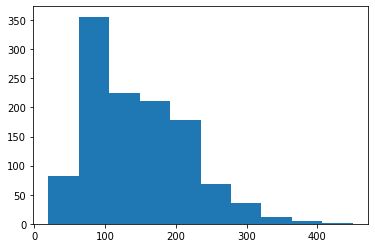

In [46]:
import matplotlib.pyplot as plt
plt.hist(df_entrenamiento['DIAMETRO'],bins=10,label='Diametro');

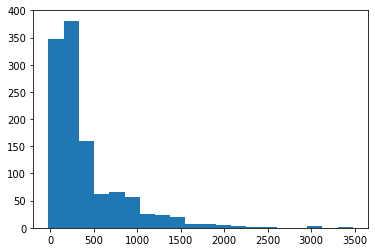

In [47]:
plt.hist(df_entrenamiento['CARRERA'],bins=20);

Text(0, 0.5, 'DIAMETRO')

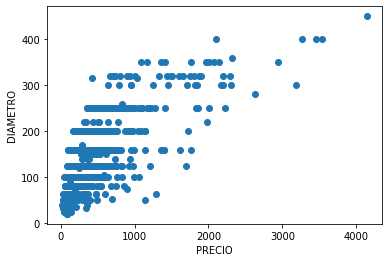

In [48]:
plt.scatter(df_entrenamiento['PRECIO1'], df_entrenamiento['DIAMETRO']);
plt.xlabel('PRECIO')
plt.ylabel('DIAMETRO')

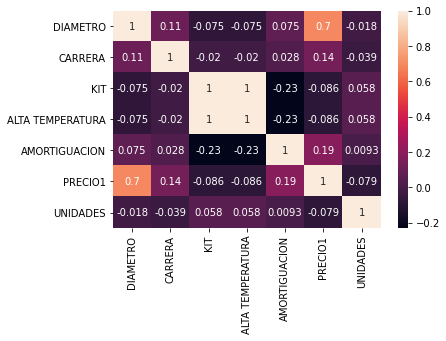

In [49]:
import seaborn as sn

df_entrenamiento_heat = pd.DataFrame(df_entrenamiento,columns=df_entrenamiento.drop(columns='ARTICULO').columns)

corrMatrix = df_entrenamiento_heat.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [50]:
prueba = {'MP CAMISA':['ACERO'],'MP VASTAGO':['CROMADO'],'MP VARILLAS':['NO'],'MP CABEZA PISTON':['ACERO'],'MP TAPA GUIA':['MP'],'MP TAPA TRASERA':['MP'],'DIAMETRO':[200],'CARRERA':[560],'AMARRE 0':['HORQUILLA'],'AMARRE 1':['NO'],'AMARRE 2':['NO'],'AMARRE 3':['NO'],'AMARRE 4':['NO'],'AMARRE 5':['NO'],'AMARRE 6':['NO'],'AMARRE 7':['NO'],'AMARRE 8':['NO'],'AMARRE 9':['NO'],'AMARRE 10':['NO'],'EXTRA 1':['NO'],'EXTRA 2':['NO'],'EXTRA 3':['NO'],'EXTRA 4':['NO'],'EXTRA 5':['NO'],'EXTRA 6':['NO'],'EXTRA 7':['NO'],'UNIDADES':[1]}

In [51]:
df_prueba = pd.DataFrame.from_dict(prueba)
df_prueba

,MP CAMISA,MP VASTAGO,MP VARILLAS,MP CABEZA PISTON,MP TAPA GUIA,MP TAPA TRASERA,DIAMETRO,CARRERA,AMARRE 0,AMARRE 1,AMARRE 2,AMARRE 3,AMARRE 4,AMARRE 5,AMARRE 6,AMARRE 7,AMARRE 8,AMARRE 9,AMARRE 10,EXTRA 1,EXTRA 2,EXTRA 3,EXTRA 4,EXTRA 5,EXTRA 6,EXTRA 7,UNIDADES
0,ACERO,CROMADO,NO,ACERO,MP,MP,200,560,HORQUILLA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1


## Entrenamiento del Modelo

Vamos a entrenar el dataframe con un modelo de regresion sencillo y analizamos las métricas para evaluarlo.

In [52]:
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler
import pickle
from sklearn.pipeline import make_pipeline

scaler = StandardScaler(with_mean=False)
mmScaler = MaxAbsScaler()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
lr = LinearRegression()
rfr0 = RandomForestRegressor()
rfr1 = RandomForestRegressor(n_estimators = 10000)
rfr2 = RandomForestRegressor()
rfr3 = RandomForestRegressor()

Definimos una funcion para evaluar los modelos

In [53]:
def evaluate(X_test, ys_test, ys_hat):
    

    mse = mean_squared_error(ys_test, ys_hat)
    mae = mean_absolute_error(ys_test, ys_hat)
    mape = np.mean(np.abs(ys_test - ys_hat) / ys_test)
    ev = explained_variance_score(ys_test, ys_hat)

    return mse, mae, mape, ev


In [54]:
Y = df_entrenamiento['PRECIO1']

X = df_entrenamiento.drop(columns=['PRECIO1','ARTICULO'])
X

,MP CAMISA,MP VASTAGO,MP VARILLAS,MP CABEZA PISTON,MP TAPA GUIA,MP TAPA TRASERA,DIAMETRO,CARRERA,KIT,ALTA TEMPERATURA,AMORTIGUACION,AMARRE 0,AMARRE 1,AMARRE 2,AMARRE 3,AMARRE 4,AMARRE 5,AMARRE 6,AMARRE 7,AMARRE 8,AMARRE 9,AMARRE 10,EXTRA 1,EXTRA 2,EXTRA 3,EXTRA 4,EXTRA 5,EXTRA 6,EXTRA 7,UNIDADES
0,ACERO,ACERO,F-2111,MP,MP,MP,125,420,0,0,0,ESCUADRA,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1
2,ALUMINIO,ACERO,F-2111,MP,MP,MP,200,1283,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,2
4,ALUMINIO,ACERO,F-2111,MP,MP,MP,200,1188,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1
14,ALUMINIO,ACERO,F-2111,MP,MP,MP,160,350,0,0,1,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,2
32,ALUMINIO,ACERO,F-2111,MP,MP,MP,200,350,0,0,1,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,ALUMINIO,INOX,F-2111,MP,MP,MP,200,300,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1
5653,ACERO,COMPRADO,NO,COMPRADO,ACERO,ACERO,50,1200,0,0,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1
5655,ACERO,COMPRADO,NO,COMPRADO,ACERO,ACERO,100,80,0,0,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VASTAGO,VASTAGO,NO,NO,NO,NO,NO,1
5657,ACERO,ACERO,F-2111,MP,MP,MP,160,310,0,0,1,CONTRATUERCA,ZUNCHO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1


In [55]:
categorical_cols = list(df_entrenamiento.select_dtypes(include =['category']).columns)

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),categorical_cols),
    remainder='passthrough')

#column_trans.fit_transform(X)

Definimos distintos pipelines para medir la efectividad

In [57]:
pipe0 = make_pipeline(column_trans, rfr0)
pipe = make_pipeline(column_trans,scaler, rfr2)
pipe1 = make_pipeline(column_trans,scaler, rfr3)
pipe2 = make_pipeline(column_trans,scaler, rfr1)
pipe3 = make_pipeline(column_trans,scaler, lr)
pipe4 = make_pipeline(column_trans,scaler, knr)
pipe5 = make_pipeline(column_trans,scaler, dtr)

In [58]:
pipe6 = make_pipeline(column_trans,mmScaler, rfr0)
pipe7 = make_pipeline(column_trans,mmScaler, rfr2)
pipe8 = make_pipeline(column_trans,mmScaler, rfr3)

Debido a que tenemos pocos datos definimos el entrenamiento en un 80%

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [60]:
X_train

,MP CAMISA,MP VASTAGO,MP VARILLAS,MP CABEZA PISTON,MP TAPA GUIA,MP TAPA TRASERA,DIAMETRO,CARRERA,KIT,ALTA TEMPERATURA,AMORTIGUACION,AMARRE 0,AMARRE 1,AMARRE 2,AMARRE 3,AMARRE 4,AMARRE 5,AMARRE 6,AMARRE 7,AMARRE 8,AMARRE 9,AMARRE 10,EXTRA 1,EXTRA 2,EXTRA 3,EXTRA 4,EXTRA 5,EXTRA 6,EXTRA 7,UNIDADES
749,ALUMINIO,ACERO,COMPRADO,MP,MP,MP,63,160,0,0,1,CONTRATUERCA,ZUNCHO,ROTULA,SOPORTE,SOPORTE,NO,NO,NO,NO,NO,NO,PISTON,VARILLA,NO,NO,NO,NO,NO,1
212,ALUMINIO,ACERO,F-2111,MP,MP,MP,100,200,0,0,0,ROTULA,SOPORTE,CONTRATUERCA,ROTULA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1
2106,ACERO,ACERO,F-2111,MP,MP,MP,80,100,0,0,0,CONTRATUERCA,ARTICULACION HEMBRA,ARTICULACION MACHO,HORQUILLA,BULON,BULON,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1
5272,ACERO,ACERO,F-2111,ACERO,ACERO,ACERO,80,2500,0,0,1,ESCUADRA,ESCUADRA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1
5338,ALUMINIO,ACERO,F-2111,COMPRADO,NO,NO,250,400,1,1,0,ZUNCHO,HORQUILLA,DETECTOR,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,ACERO,COMPRADO,NO,COMPRADO,ACERO,ACERO,100,80,0,0,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,VASTAGO,VASTAGO,NO,NO,NO,NO,NO,1
3311,ACERO,ACERO,F-2111,ACERO,ACERO,ACERO,80,127,0,0,1,ZUNCHO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1
2935,ACERO,ACERO,F-2111,ACERO,ACERO,NO,100,935,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,PISTON,VASTAGO,NO,NO,NO,NO,NO,6
4414,ALUMINIO,ACERO,F-2111,MP,MP,MP,250,400,0,0,0,CONTRATUERCA,DETECTOR,HORQUILLA,ZUNCHO,NO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,23


Entrenamos los pipelines y evaluamos las predicciones

In [61]:
pipe0.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [62]:
predictions0 = pipe0.predict(X_test)


In [63]:
evaluate(X_test, y_test, predictions0)

(51350.60020396479,
 125.30428400883699,
 0.35081326561353793,
 0.7259973986822734)

In [64]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [65]:
predictions = pipe.predict(X_test)

In [66]:
evaluate(X_test, y_test, predictions)

(52450.54031218092, 124.65321799435603, 0.3466240405686057, 0.7201089993576468)

In [67]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [68]:
predictions1 = pipe1.predict(X_test)

In [69]:
evaluate(X_test, y_test, predictions1)

(49041.98277320198,
 123.09287582416353,
 0.34845533452439764,
 0.7376675769109955)

In [70]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [71]:
predictions1 = pipe1.predict(X_test)

In [72]:
evaluate(X_test, y_test, predictions1)

(52616.92395815166, 125.68357186084684, 0.348566280431344, 0.7195560771668557)

In [73]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [74]:
predictions2 = pipe1.predict(X_test)

In [75]:
evaluate(X_test, y_test, predictions2)

(52616.92395815166, 125.68357186084684, 0.348566280431344, 0.7195560771668557)

In [76]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [77]:
predictions3 = pipe3.predict(X_test)

In [78]:
evaluate(X_test, y_test, predictions3)

(79068.00371523383, 182.1762413913228, 0.6515033773883676, 0.5761578209662512)

In [79]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [80]:
predictions4 = pipe4.predict(X_test)

In [81]:
evaluate(X_test, y_test, predictions4)

(101502.4, 181.38678, 0.5813914, 0.46226078271865845)

In [82]:
pipe5.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [83]:
predictions5 = pipe5.predict(X_test)

In [84]:
evaluate(X_test, y_test, predictions5)

(73399.37336893553, 148.48889128231832, 0.4101824145987861, 0.608774519774758)

In [85]:
pipe6.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [86]:
predictions6 = pipe6.predict(X_test)

In [87]:
evaluate(X_test, y_test, predictions6)

(51338.457068926844,
 126.51557533862335,
 0.35020952780300885,
 0.7262334394495509)

In [88]:
pipe7.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [89]:
predictions7 = pipe7.predict(X_test)

In [90]:
evaluate(X_test, y_test, predictions7)

(48942.07327477886, 123.68526452960124, 0.3460380439581236, 0.7392476740571983)

In [91]:
pipe8.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MP CAMISA', 'MP VASTAGO',
                                                   'MP VARILLAS',
                                                   'MP CABEZA PISTON',
                                                   'MP TAPA GUIA',
                                                   'MP TAPA TRASERA',
                                                   'AMARRE 0', 'AMARRE 1',
                                                   'AMARRE 2', 'AMARRE 3',
                                                   'AMARRE 4', 'AMARRE 5',
                                                   'AMARRE 6', 'AMARRE 7',
                                                   'AMARRE 8', 'AMARRE 9',
                  

In [92]:
predictions8 = pipe8.predict(X_test)

In [93]:
evaluate(X_test, y_test, predictions8)

(53458.67763724126, 125.77023022761553, 0.34845665274056087, 0.714758595734696)

Se guarda el pipeline para utilizarlo en producción

In [94]:
from pickle import dump
dump(pipe8, open('pipe.pkl', 'wb'))

Para tener una imagen real de como predice de los valores reales creamos una tabla comparativa

In [95]:
y_test_df = y_test.to_frame()

Se elige el "predictions8" porque es el que mejores metricas nos da

In [96]:
y_test_df['PREDICTED'] = predictions8

Filtramos los errores mayores del 10%

In [97]:
max_error_df = y_test_df[(abs(y_test_df['PRECIO1']-y_test_df['PREDICTED'])*100/y_test_df['PRECIO1']) >10]
max_error_df

,PRECIO1,PREDICTED
395,694.349976,1015.313286
3516,385.070007,436.864166
4178,448.660004,542.716899
2263,1761.079956,773.769495
1410,183.759995,231.623699
...,...,...
5238,390.309998,495.433575
1662,224.539993,251.719100
612,451.480011,365.966701
2241,47.759998,197.759403


Para saber de que cilindros estamos hablando lo unimos con la tabla del entrenamiento

In [98]:
mergedDf = max_error_df.merge(df_entrenamiento, left_index=True, right_index=True)
mergedDf.head(100)

,PRECIO1_x,PREDICTED,ARTICULO,MP CAMISA,MP VASTAGO,MP VARILLAS,MP CABEZA PISTON,MP TAPA GUIA,MP TAPA TRASERA,DIAMETRO,CARRERA,KIT,ALTA TEMPERATURA,AMORTIGUACION,AMARRE 0,AMARRE 1,AMARRE 2,AMARRE 3,AMARRE 4,AMARRE 5,AMARRE 6,AMARRE 7,AMARRE 8,AMARRE 9,AMARRE 10,EXTRA 1,EXTRA 2,EXTRA 3,EXTRA 4,EXTRA 5,EXTRA 6,EXTRA 7,PRECIO1_y,UNIDADES
395,694.349976,1015.313286,7025A400P777,ALUMINIO,INOX,F-2111,MP,MP,MP,250,400,0,0,1,CONTRATUERCA,ZUNCHO,HORQUILLA,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,VARILLA,NO,NO,NO,NO,NO,694.349976,1
3516,385.070007,436.864166,20160A0375P035,ACERO,COMPRADO,F-2111,MP,MP,MP,160,375,0,0,0,CONTRATUERCA,ARTICULACION HEMBRA,BULON,ARTICULACION MACHO,HORQUILLA,BULON,SOPORTE,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,385.070007,5
4178,448.660004,542.716899,30125A0150P390,ACERO,ACERO,F-2111,ACERO,ACERO,ACERO,125,150,0,0,1,SOPORTE,CONTRATUERCA,ROTULA,DETECTOR,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,448.660004,4
2263,1761.079956,773.769495,60160A360P452,ACERO,NO,F-2111,COMPRADO,ALUMINIO,MP,160,360,0,0,0,CREMALLERA,PIÑON,PIÑON,SOPORTE,PIÑON,NO,NO,NO,NO,NO,NO,TAPA TRAS,CAMISA,TAPA GUIA,VARILLA,PISTON,NO,NO,1761.079956,1
1410,183.759995,231.623699,7012C200P074,ALUMINIO,INOX,F-2111,MP,MP,MP,125,165,0,0,0,CONTRATUERCA,ZUNCHO,HORQUILLA,NO,NO,NO,NO,NO,NO,NO,NO,VARILLA,VARILLA,NO,NO,NO,NO,NO,183.759995,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2322.939941,2017.891633,ES360A0800P532,NO,ACERO,F-2111,COMPRADO,COMPRADO,COMPRADO,360,800,0,0,1,SOPORTE,CONTRATUERCA,ZUNCHO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,2322.939941,2
1316,367.070007,466.352546,ES15A380P003,ACERO,ACERO,F-2111,ACERO,ACERO,ACERO,150,380,0,0,1,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,367.070007,1
2092,299.549988,199.260084,20160A0575P363,ACERO,ACERO,F-2111,MP,MP,MP,160,575,0,0,0,CONTRATUERCA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,299.549988,1
3684,327.940002,274.738048,70100A0120P123,ALUMINIO,ACERO,COMPRADO,MP,MP,MP,100,120,0,0,1,CONTRATUERCA,SOPORTE,FUELLE,ROTULA,ZUNCHO,NO,NO,NO,NO,NO,NO,VARILLA,NO,NO,NO,NO,NO,NO,327.940002,1
